# Loading Data

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
path = '/content/drive/MyDrive/Colab Notebooks/files/bc-student-outcomes-program-data-viewer-file-2021-to-2023.csv'

# Import Required Libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

# Data Exploration and Analysis

In [54]:
# load dataset
pd.set_option('display.max_columns', None)
data_original = pd.read_csv(path)
data_original

,CREDENTIAL,GROUPBY,INSTITUTION,INSTITUTION_NAME,PROGRAM_AREA,PROGRAM_AREA_NAME,PROGRAM_NAME,RESPONDENTS,RESPONSE_RATE,AGE,FEMALE,MALE,Q49A,Q51NA,Q51NB,Q51ND,Q51NE1,Q51NE2,Q51NI,Q51NJ,Q52A,SELF_EMPLOYED,EMPLOY_FULL_TIME,JOB_PROGRAM_RELATED,USEFUL_PERFORM_JOB,IN_LABR_MKT,EMPLOYED,UNEMPLOYED,SALARY_WAGE,FURTH_STUDIES,Q11_7,Q52_6
0,Certificate,Institution and Program,NLC,Northern Lights College,6,Education,Education Assistant,39,0.6393,41.0,-2.0000,-1.0000,0.9743,0.9705,0.9444,0.9736,0.9743,0.8461,0.9487,1.0000,1.0000,-6.0000,0.5428,0.9729,1.0000,1.0000,-11.0000,0.0,26.000,0.2820,NaN,NaN
1,Certificate,Institution and Program,NLC,Northern Lights College,6,Education,Education Assistant Certificate,27,0.5510,42.0,-2.0000,-1.0000,0.9615,0.9090,0.8695,0.9230,0.8846,0.9629,1.0000,0.8518,0.9629,-6.0000,0.7083,1.0000,0.9583,0.9629,-11.0000,-99.0,27.440,0.1923,NaN,NaN
2,Certificate,Institution and Program,SEL,Selkirk College,3,Business and Management,Office Administration & Technology Certificate,27,0.6136,36.0,-2.0000,-1.0000,0.8518,1.0000,0.6956,0.6923,0.8888,0.7916,0.7777,0.9200,0.8518,-6.0000,0.6666,0.7368,0.8421,0.8888,0.7407,-99.0,27.425,0.1923,NaN,NaN
3,Certificate,Institution and Program,SEL,Selkirk College,4,Health,Nursing Unit Clerk,53,0.5047,37.0,-2.0000,-1.0000,0.7924,0.7027,0.5517,0.6578,0.7346,0.6521,0.8600,0.8600,0.8269,0.0000,0.7045,0.8200,0.8750,0.9811,-11.0000,-99.0,23.980,0.1538,NaN,NaN
4,Certificate,Institution and Program,SEL,Selkirk College,4,Health,Health Care Assistant,93,0.5670,36.0,0.9032,0.0967,0.9347,0.8500,0.8928,0.9418,0.9310,0.9080,0.9058,0.9090,0.9560,0.0000,0.8701,0.9404,0.9642,0.9555,0.9130,-99.0,25.000,0.1935,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,Diploma,Institution and Program Area,NVIT,Nicola Valley Institute of Technology,1,Arts and Sciences,All Programs,14,0.6666,48.5,-2.0000,-1.0000,1.0000,1.0000,0.9285,0.7692,0.7692,0.7500,0.9285,1.0000,1.0000,-99.0000,-99.0000,0.6666,0.6666,0.5714,0.5000,-99.0,30.440,0.7857,NaN,NaN
2098,Diploma,Institution and Program Area,NVIT,Nicola Valley Institute of Technology,3,Business and Management,All Programs,12,0.6315,40.5,1.0000,0.0000,0.9166,0.8333,0.8333,0.7500,1.0000,0.8333,1.0000,1.0000,0.8333,-99.0000,-99.0000,0.8571,0.8571,0.8181,0.5833,-99.0,20.920,0.4166,NaN,NaN
2099,Diploma,Institution and Program Area,NVIT,Nicola Valley Institute of Technology,4,Health,All Programs,27,0.6750,36.0,-2.0000,-1.0000,1.0000,0.9259,1.0000,0.9615,1.0000,1.0000,0.9615,1.0000,1.0000,0.0000,-9.0000,1.0000,1.0000,1.0000,-11.0000,0.0,28.430,0.2222,NaN,NaN
2100,Diploma,Institution and Program Area,NVIT,Nicola Valley Institute of Technology,5,Engineering and Applied Sciences,All Programs,14,0.3684,31.0,0.4285,0.5714,0.8571,1.0000,1.0000,0.9230,1.0000,0.8571,0.9285,1.0000,1.0000,-6.0000,-9.0000,1.0000,1.0000,1.0000,-11.0000,-99.0,28.875,0.3333,NaN,NaN


In [55]:
#Creating a copy of original data set
data = data_original.copy()

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CREDENTIAL           2102 non-null   object 
 1   GROUPBY              2102 non-null   object 
 2   INSTITUTION          2102 non-null   object 
 3   INSTITUTION_NAME     2102 non-null   object 
 4   PROGRAM_AREA         2102 non-null   object 
 5   PROGRAM_AREA_NAME    2102 non-null   object 
 6   PROGRAM_NAME         2102 non-null   object 
 7   RESPONDENTS          2102 non-null   int64  
 8   RESPONSE_RATE        2102 non-null   float64
 9   AGE                  2102 non-null   float64
 10  FEMALE               2102 non-null   float64
 11  MALE                 2102 non-null   float64
 12  Q49A                 2102 non-null   float64
 13  Q51NA                2102 non-null   float64
 14  Q51NB                2102 non-null   float64
 15  Q51ND                2102 non-null   f

In [44]:
data.describe()

,RESPONDENTS,RESPONSE_RATE,AGE,FEMALE,MALE,Q49A,Q51NA,Q51NB,Q51ND,Q51NE1,Q51NE2,Q51NI,Q51NJ,Q52A,SELF_EMPLOYED,EMPLOY_FULL_TIME,JOB_PROGRAM_RELATED,USEFUL_PERFORM_JOB,IN_LABR_MKT,EMPLOYED,UNEMPLOYED,SALARY_WAGE,FURTH_STUDIES,Q11_7,Q52_6
count,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,1656.000000,207.000000,239.000000
mean,191.318268,0.494679,27.473121,-0.011110,-0.430435,0.905641,0.825071,0.809833,0.858180,0.908733,0.850029,0.881928,0.896388,0.935832,-8.950762,-11.503596,0.739386,0.846907,0.911049,-3.565723,-46.175716,16583.333325,0.373285,0.860477,0.612088
std,988.596133,0.114453,5.099054,0.979682,1.812471,0.084016,0.121326,0.116917,0.100155,0.068451,0.092430,0.072400,0.075411,0.070906,23.951736,27.485203,0.206001,0.125734,0.102865,7.279576,49.336193,27710.889258,0.219424,0.083756,0.160636
min,10.000000,0.162700,18.000000,-3.000000,-5.000000,0.111100,0.000000,0.000000,0.375000,0.500000,0.388800,0.466600,0.411700,0.303000,-99.000000,-99.000000,0.000000,0.125000,0.142800,-99.000000,-99.000000,-99.000000,0.000000,0.571400,0.000000
25%,21.000000,0.413700,25.000000,-1.000000,-1.000000,0.875000,0.761900,0.744925,0.807000,0.875000,0.802150,0.846225,0.859700,0.911700,-6.000000,-9.000000,0.611100,0.795975,0.880625,-11.000000,-99.000000,20.852500,0.200000,0.812500,0.500000
50%,40.000000,0.488150,26.000000,0.440900,0.310150,0.918600,0.847700,0.823800,0.877500,0.916600,0.861100,0.888800,0.907900,0.951200,-3.000000,0.545400,0.785150,0.873950,0.943150,0.716900,-1.500000,26.500000,0.343950,0.857100,0.613600
75%,102.000000,0.565200,29.500000,0.674875,0.541325,0.956500,0.909000,0.893400,0.928500,0.952300,0.913000,0.928325,0.944400,0.985150,0.000000,0.891000,0.900000,0.933300,0.978875,0.857100,0.067050,42527.730000,0.519625,0.921500,0.724100
max,27549.000000,1.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.716600,1.000000,1.000000,1.000000,1.000000,1.000000,0.416600,145000.000000,1.000000,1.000000,1.000000


In [57]:
#Shape of data
data.shape

(2102, 32)

<Axes: >

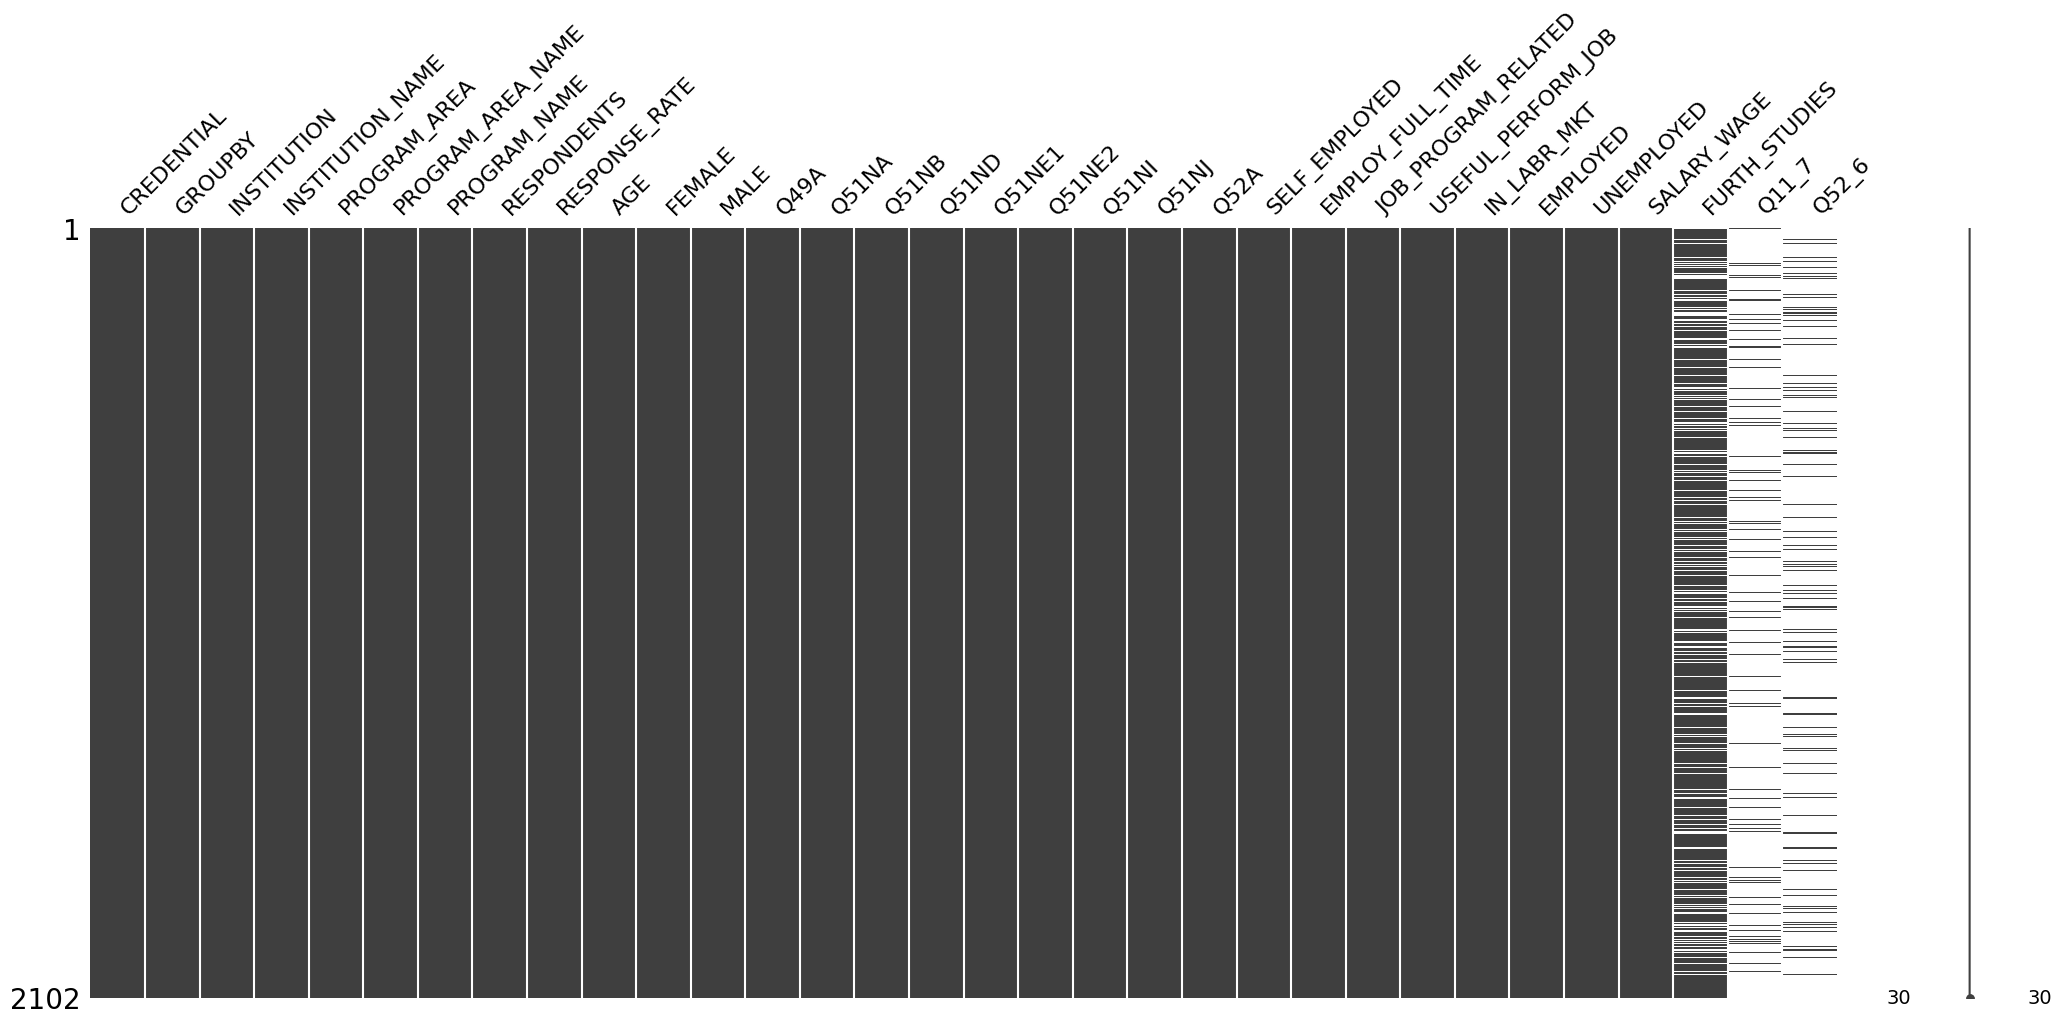

In [58]:
# Visualising Missing Values
import missingno as msno
msno.matrix(data.sample(2102))

In [59]:
data.isnull().sum()

,0
CREDENTIAL,0
GROUPBY,0
INSTITUTION,0
INSTITUTION_NAME,0
PROGRAM_AREA,0
PROGRAM_AREA_NAME,0
PROGRAM_NAME,0
RESPONDENTS,0
RESPONSE_RATE,0
AGE,0


In [48]:
# Checking duplicate rows
data.duplicated().sum()

0

In [60]:
# see are the missing value by Percentage
missing_percentage = data.isnull().sum().sort_values(ascending=False)/len(data)*100
missing_percentage

,0
Q11_7,90.152236
Q52_6,88.629876
FURTH_STUDIES,21.217888
GROUPBY,0.000000
SALARY_WAGE,0.000000
UNEMPLOYED,0.000000
EMPLOYED,0.000000
IN_LABR_MKT,0.000000
USEFUL_PERFORM_JOB,0.000000
JOB_PROGRAM_RELATED,0.000000


In [61]:
# Drop columns with over 85% missing values
data.drop(columns=['Q11_7', 'Q52_6'], inplace=True)

# Impute missing values in FURTH_STUDIES with the median
data['FURTH_STUDIES'].fillna(data['FURTH_STUDIES'].median(), inplace=True)
data['AGE'] = data['AGE'].astype(int)

<ipython-input-61-3a5b73b9b0c7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FURTH_STUDIES'].fillna(data['FURTH_STUDIES'].median(), inplace=True)


# Understanding the Data

## Student Groups

In [62]:
credential_counts = data["CREDENTIAL"].value_counts()
credential_counts

,count
CREDENTIAL,
Bachelor's Degree,604
Diploma,521
Certificate,424
Trades Foundation,239
Apprenticeship,207
Associate Degree,107


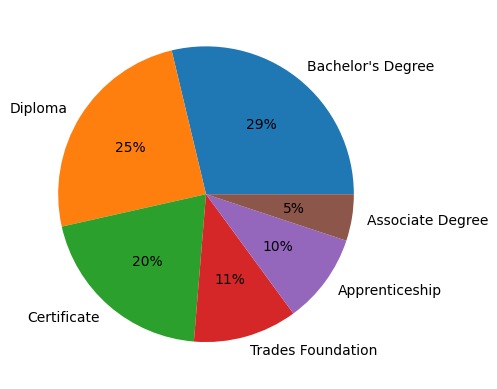

In [63]:
plt.pie(credential_counts, labels=credential_counts.index, autopct='%1.0f%%')
plt.show()

## Filter Selections



In [64]:
groupby_counts = data["GROUPBY"].value_counts()
groupby_counts

,count
GROUPBY,
Institution and Program,1446
Institution and Program Area,499
Institution,104
Program Area,47
All Institutions,6


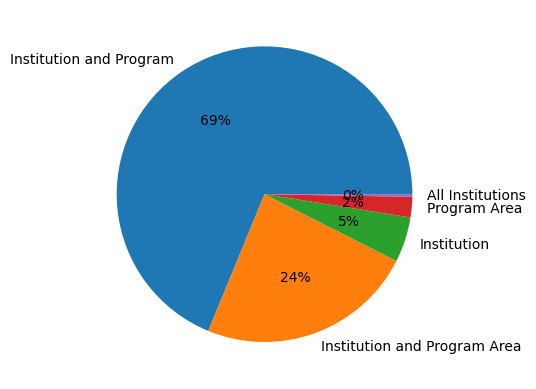

In [65]:
plt.pie(groupby_counts, labels=groupby_counts.index, autopct='%1.0f%%')
plt.show()

## Institution

In [66]:
institution_name_counts = data["INSTITUTION_NAME"].value_counts()
institution_name_counts

,count
INSTITUTION_NAME,
British Columbia Institute of Technology,259
Thompson Rivers University,135
Camosun College,127
Okanagan College,109
Kwantlen Polytechnic University,109
Vancouver Island University,103
University of British Columbia Vancouver,103
Douglas College,102
Langara College,100


In [67]:
total_institutions = data["INSTITUTION_NAME"].nunique()
total_institutions

28

## Programs

In [68]:
program_area_name_counts = data["PROGRAM_AREA_NAME"].value_counts()

program_area_name_counts

,count
PROGRAM_AREA_NAME,
Business and Management,300
Engineering and Applied Sciences,261
Health,228
Human and Social Services,192
Arts and Sciences,157
Visual and Performing Arts,120
All CIP Clusters,110
Social Sciences,89
Industrial and Heavy Duty Mechanics and Other Repair Trades,77


In [69]:
total_program_name_area = data["PROGRAM_AREA_NAME"].nunique()
total_program_name_area

22

In [70]:
program__name_counts = data["PROGRAM_NAME"].value_counts()
program__name_counts

,count
PROGRAM_NAME,
All Programs,656
Bachelor of Science in Nursing,12
Health Care Assistant,11
Bachelor of Business Administration,9
Bachelor of Social Work,7
...,...
Graphic Design Diploma,1
Jewellery Art & Design,1
Forestry Technology Diploma,1


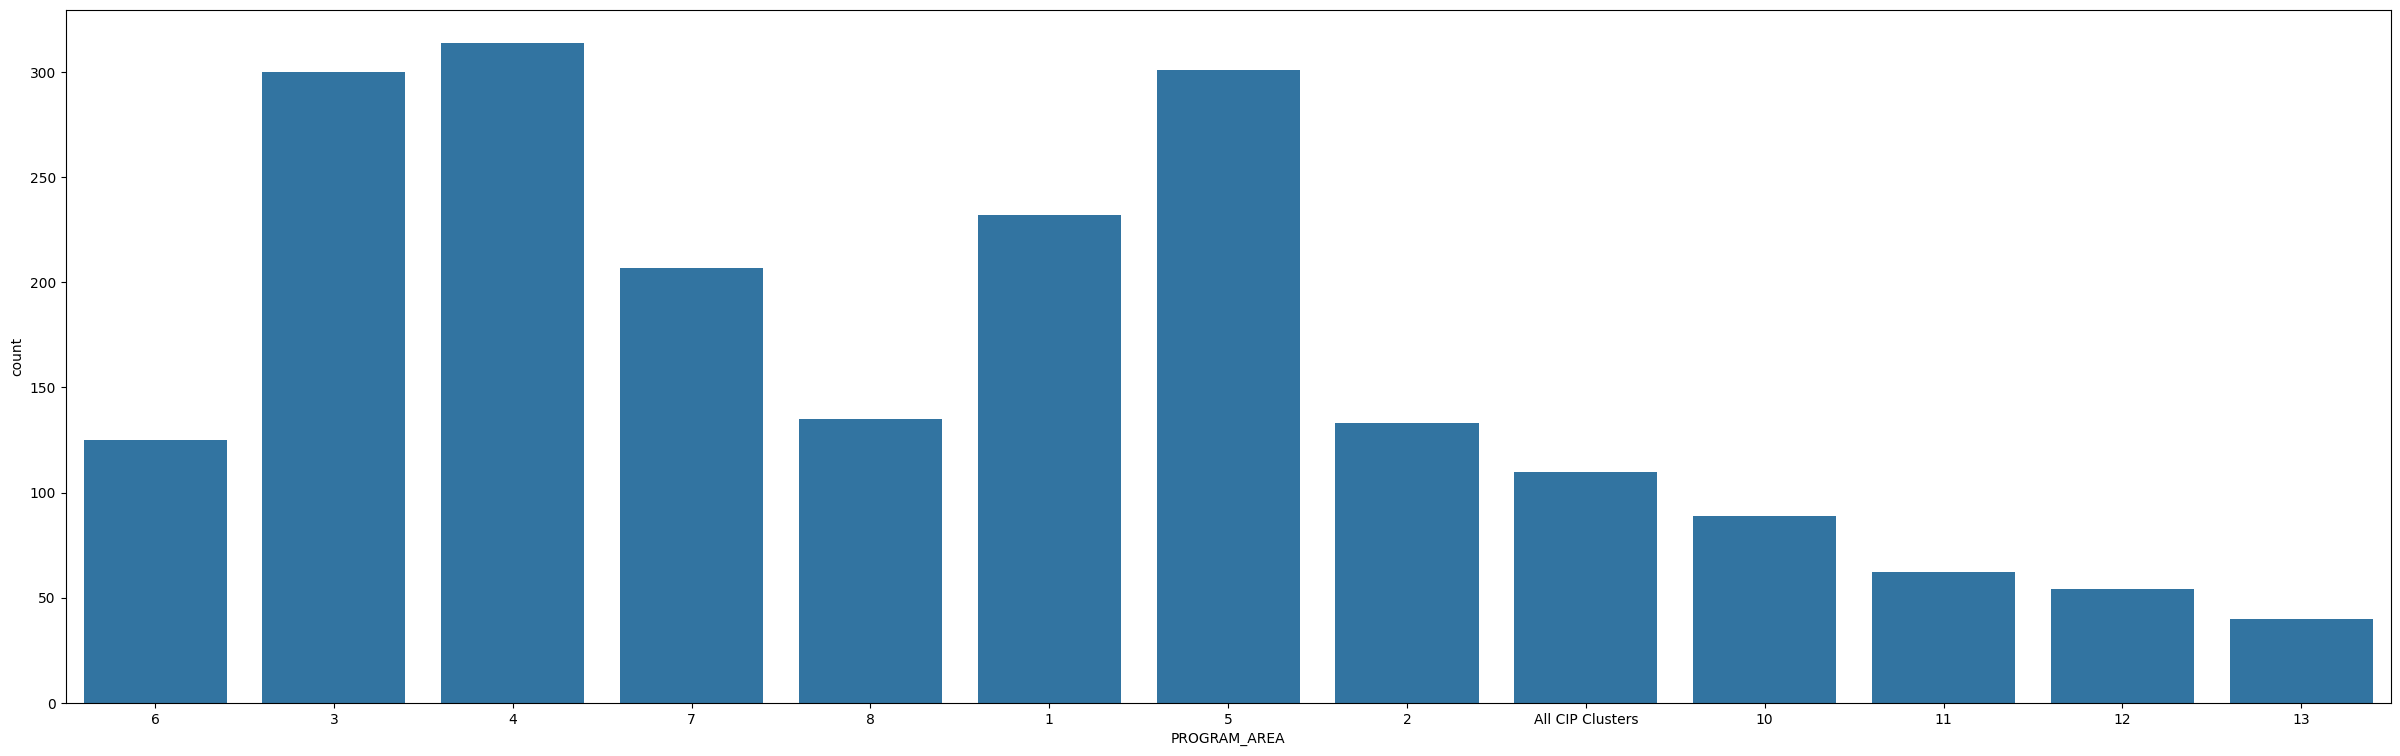

In [71]:
plt.figure(figsize = (30,9))
sns.countplot(x = 'PROGRAM_AREA', data = data)
plt.show()

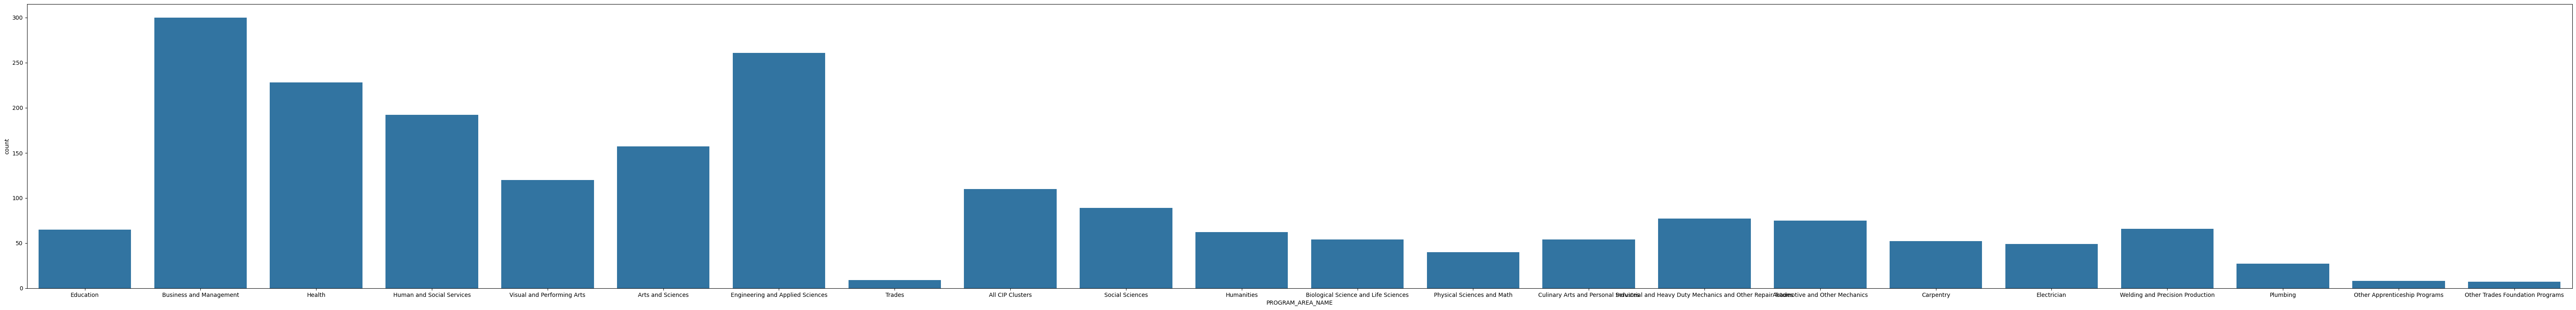

In [74]:
plt.figure(figsize = (80,9))
sns.countplot(x = 'PROGRAM_AREA_NAME', data = data)
plt.show()

## Univariate Analysis : Continuous Variables

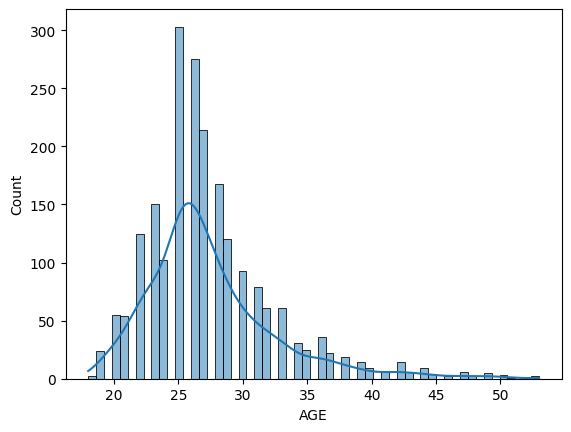

In [75]:
sns.histplot(data = data, kde = True,x = 'AGE')
plt.show()

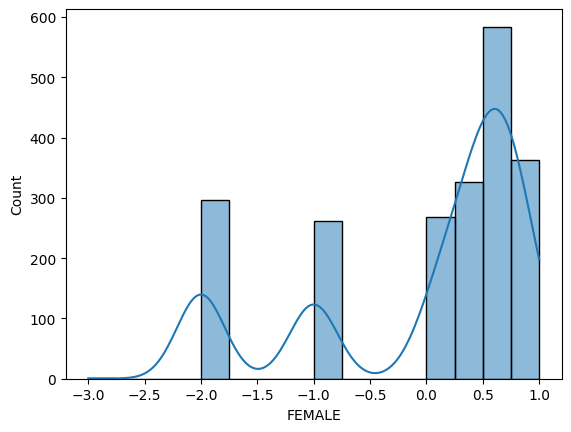

In [76]:
#proportion of females
sns.histplot(data = data, kde = True,x = 'FEMALE')
plt.show()

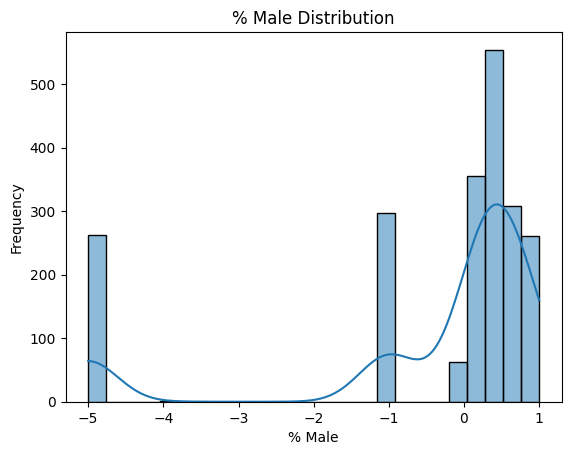

In [100]:
#proportion of males
sns.histplot(data = data, kde = True,x = 'MALE')
#Add title and labels
plt.title('% Male Distribution')
plt.xlabel('% Male')
plt.ylabel('Frequency')

# Show the histogram
plt.show()
plt.show()

#### Q49A :% who said they were "Very satisfied" or "Somewhat satisfied" with their education or training. Based on respondents who rated on a four-point scale from "Very satisfied" to "Very dissatisfied".

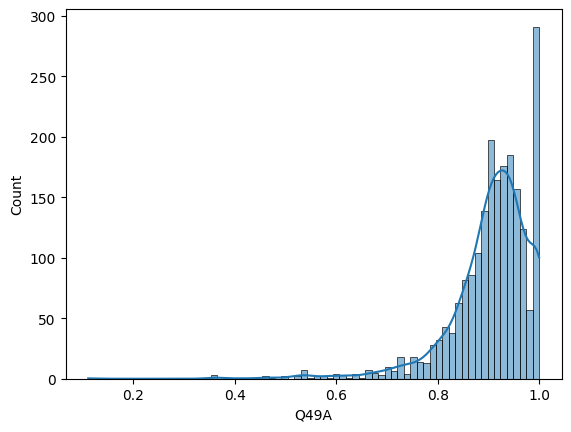

In [78]:
sns.histplot(data = data, kde = True,x = 'Q49A')
plt.show()

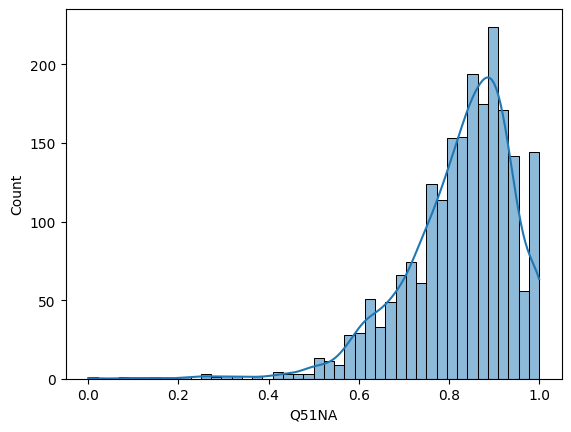

In [79]:
sns.histplot(data = data, kde = True,x = 'Q51NA')
plt.show()

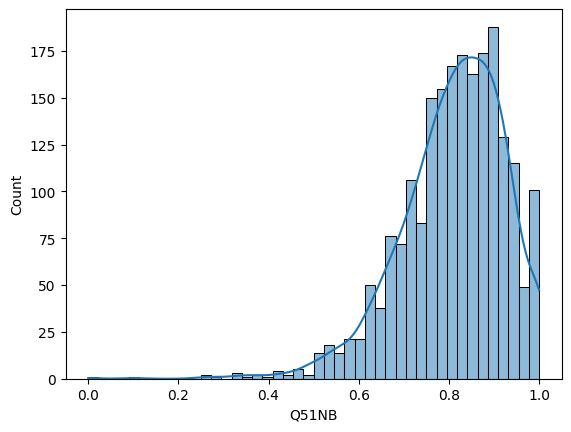

In [80]:
sns.histplot(data = data, kde = True,x = 'Q51NB')
plt.show()

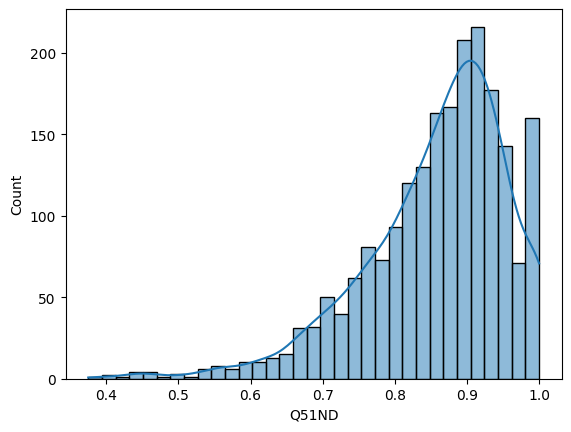

In [81]:
sns.histplot(data = data, kde = True,x = 'Q51ND')
plt.show()

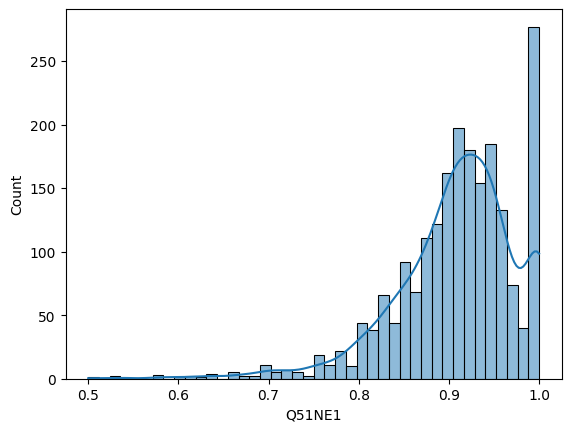

In [82]:
sns.histplot(data = data, kde = True,x = 'Q51NE1')
plt.show()

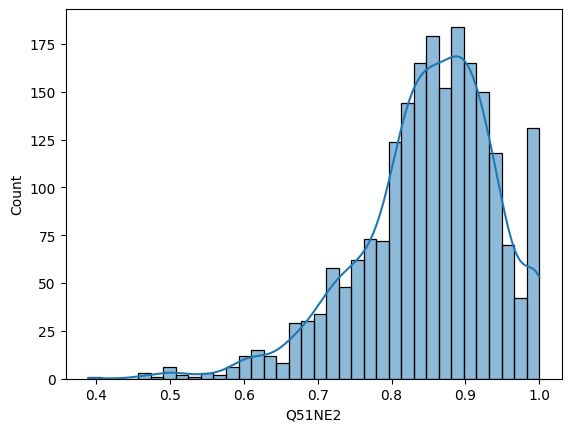

In [84]:
sns.histplot(data = data, kde = True,x = 'Q51NE2')
plt.show()

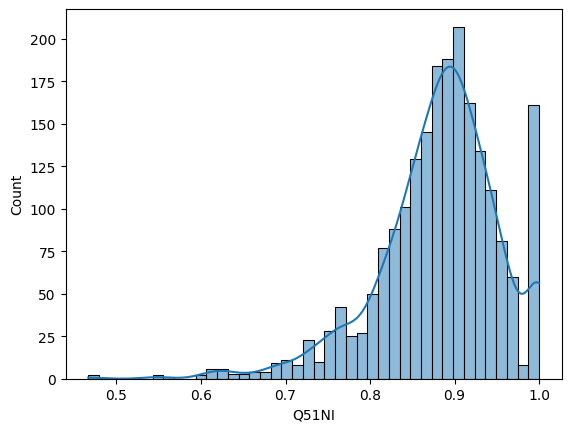

In [85]:
sns.histplot(data = data, kde = True,x = 'Q51NI')
plt.show()

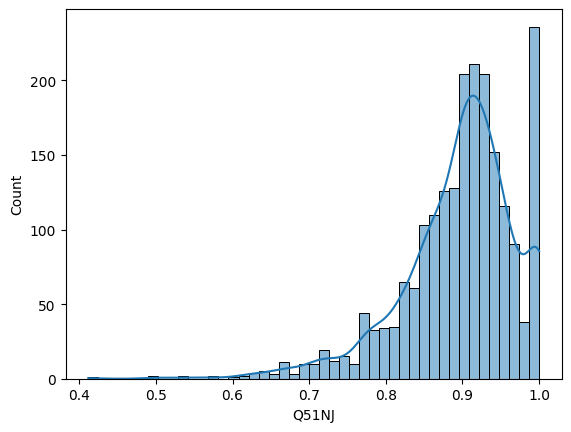

In [87]:
sns.histplot(data = data, kde = True,x = 'Q51NJ')
plt.show()

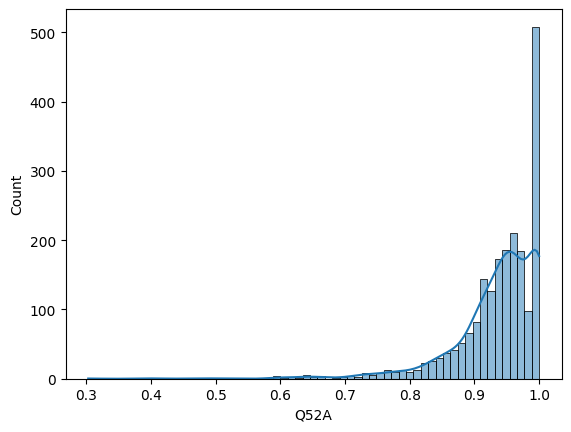

In [89]:
sns.histplot(data = data, kde = True,x = 'Q52A')
plt.show()

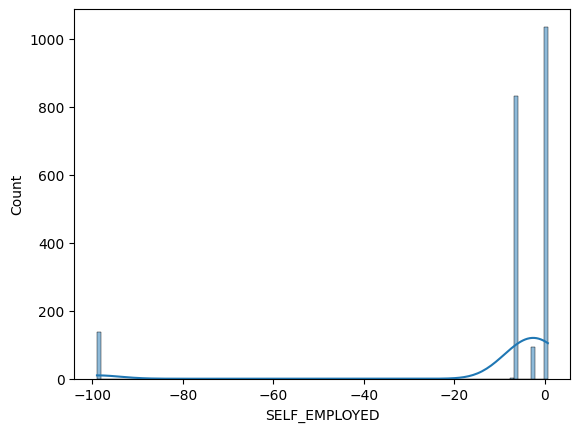

In [91]:
sns.histplot(data = data, kde = True,x = 'SELF_EMPLOYED')
plt.show()

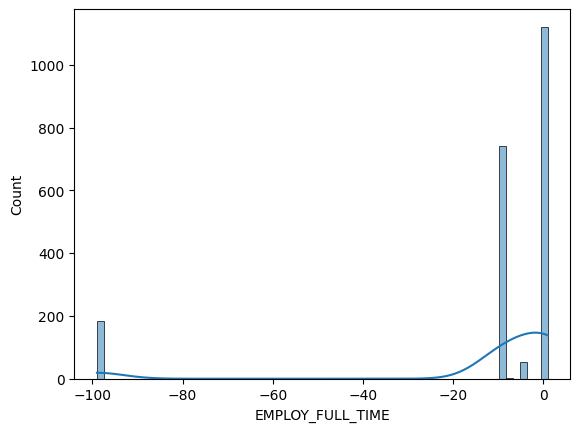

In [92]:
sns.histplot(data = data, kde = True,x = 'EMPLOY_FULL_TIME')
plt.show()

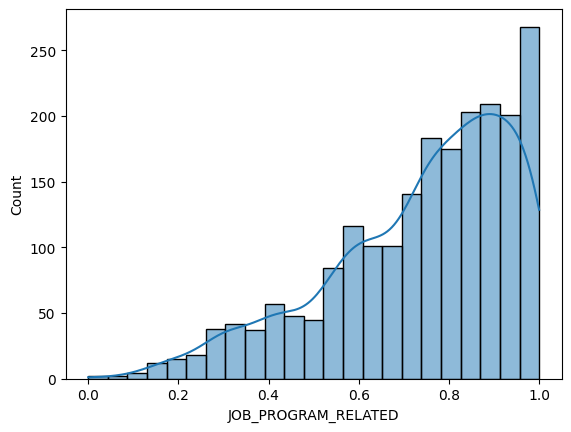

In [93]:
sns.histplot(data = data, kde = True,x = 'JOB_PROGRAM_RELATED')
plt.show()

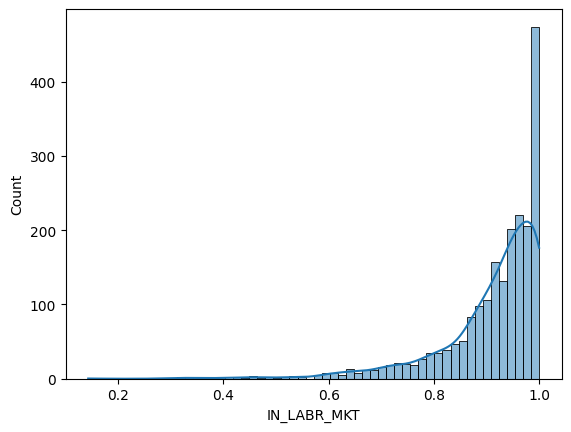

In [94]:
sns.histplot(data = data, kde = True,x = 'IN_LABR_MKT')
plt.show()

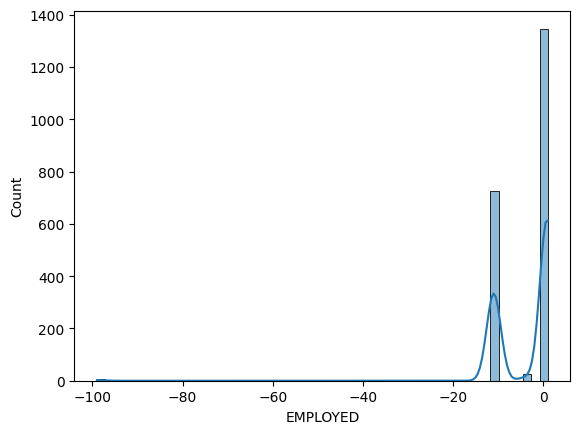

In [95]:
sns.histplot(data = data, kde = True,x = 'EMPLOYED')
plt.show()

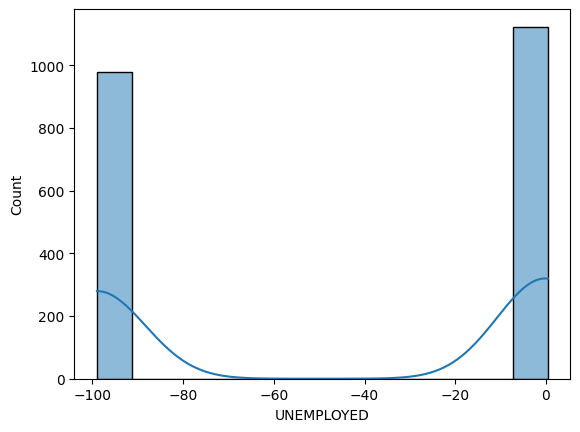

In [96]:
sns.histplot(data = data, kde = True,x = 'UNEMPLOYED')
plt.show()

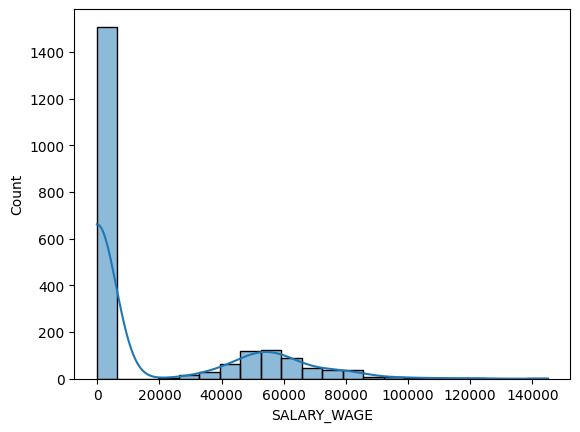

In [98]:
sns.histplot(data = data, kde = True,x = 'SALARY_WAGE')
plt.show()

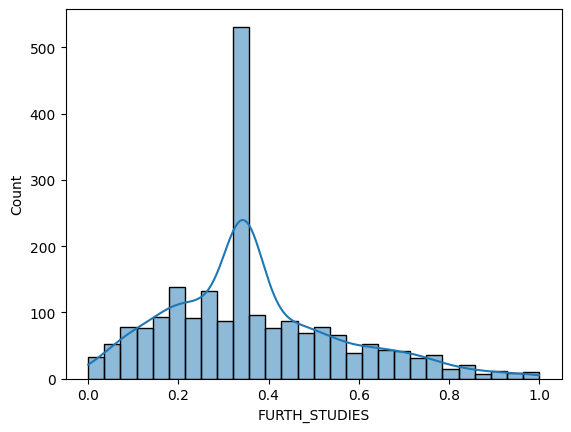

In [99]:
sns.histplot(data = data, kde = True,x = 'FURTH_STUDIES')
plt.show()

## Satisfaction with their Education BY INSTUTUTION

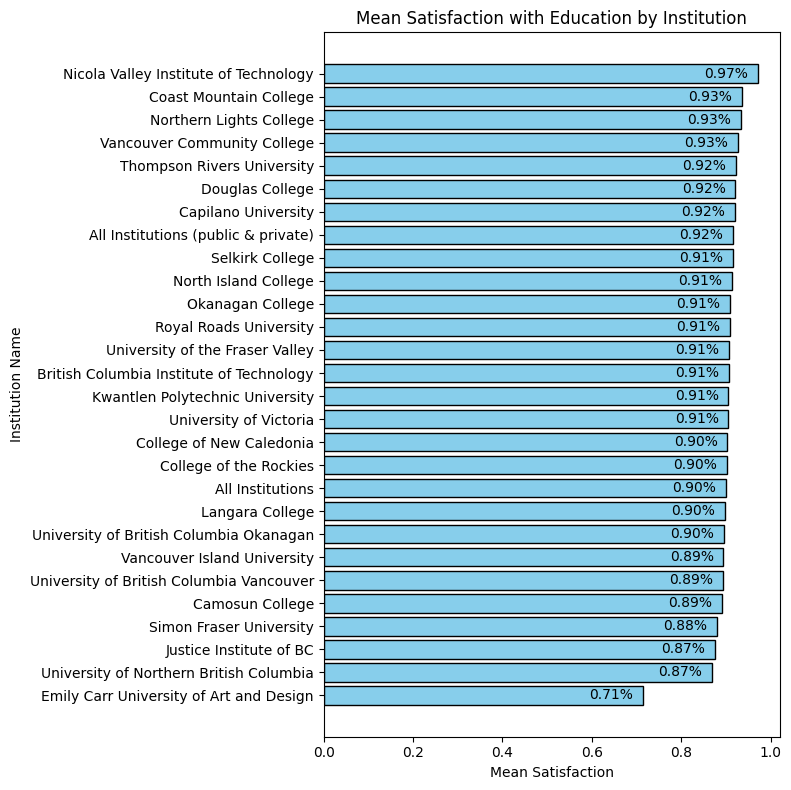

In [101]:
# Calculate the mean for 'Q49A' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q49A"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Education by Institution')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()
#% who said they were "Very satisfied" or "Somewhat satisfied" with
#their education or training. Based on respondents who rated on a
#four-point scale from "Very satisfied" to "Very dissatisfied".

## Satisfaction with the Skills

### Write Clearly and Concisely


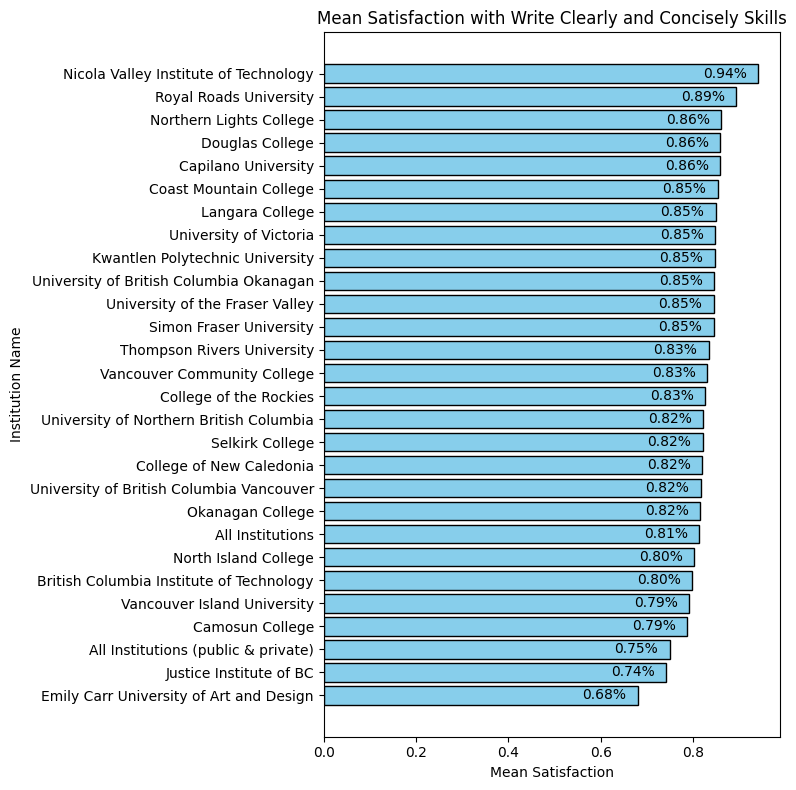

In [ ]:
# Calculate the mean for 'Q51NA' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51NA"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Write Clearly and Concisely Skills')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()


### Speak effectively


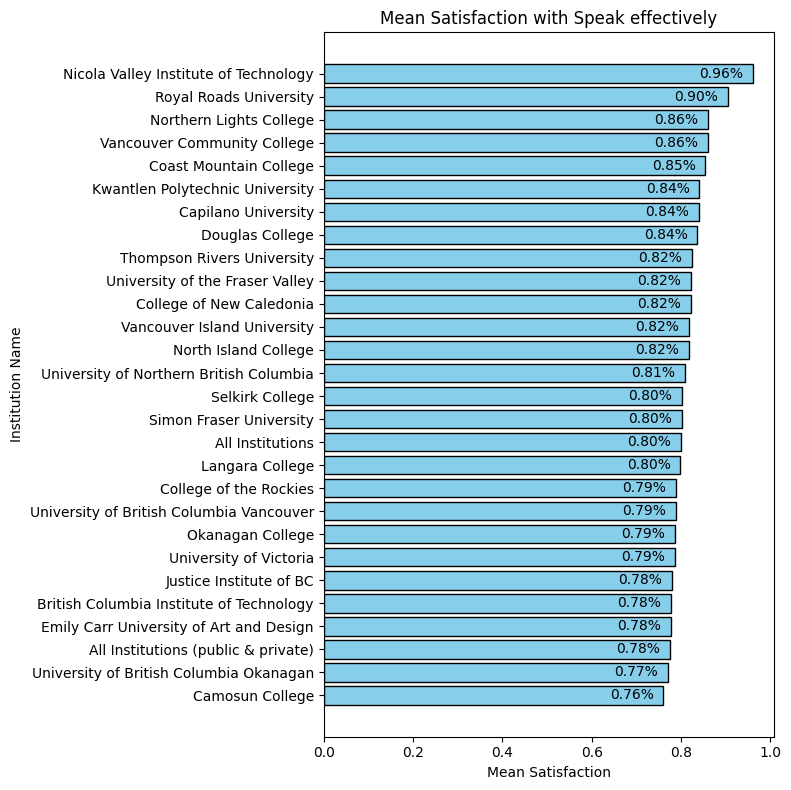

In [102]:
# Calculate the mean for 'Q51NA' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51NB"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Speak effectively')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Work effectively with others

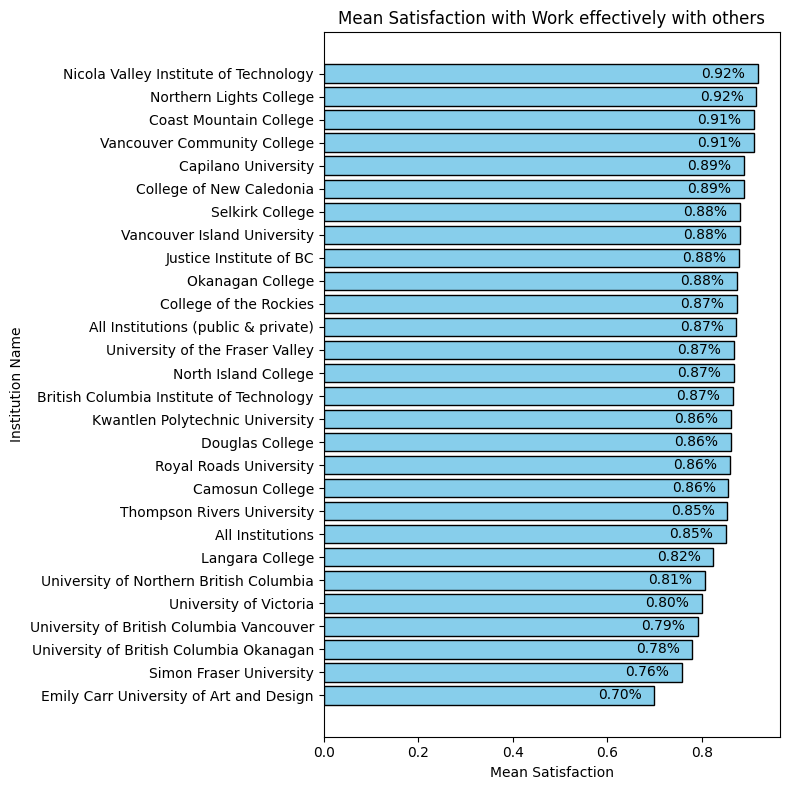

In [103]:
# Calculate the mean for 'Q51NA' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51ND"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Work effectively with others')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

###Analyse and think critically

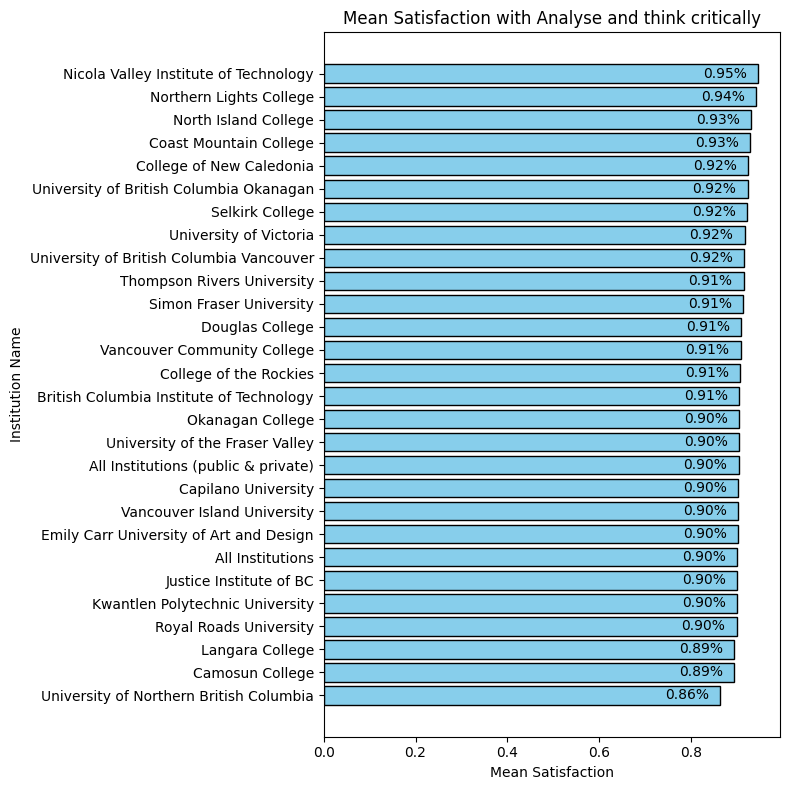

In [104]:
# Calculate the mean for 'Q51NA' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51NE1"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Analyse and think critically')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Resolve Issues

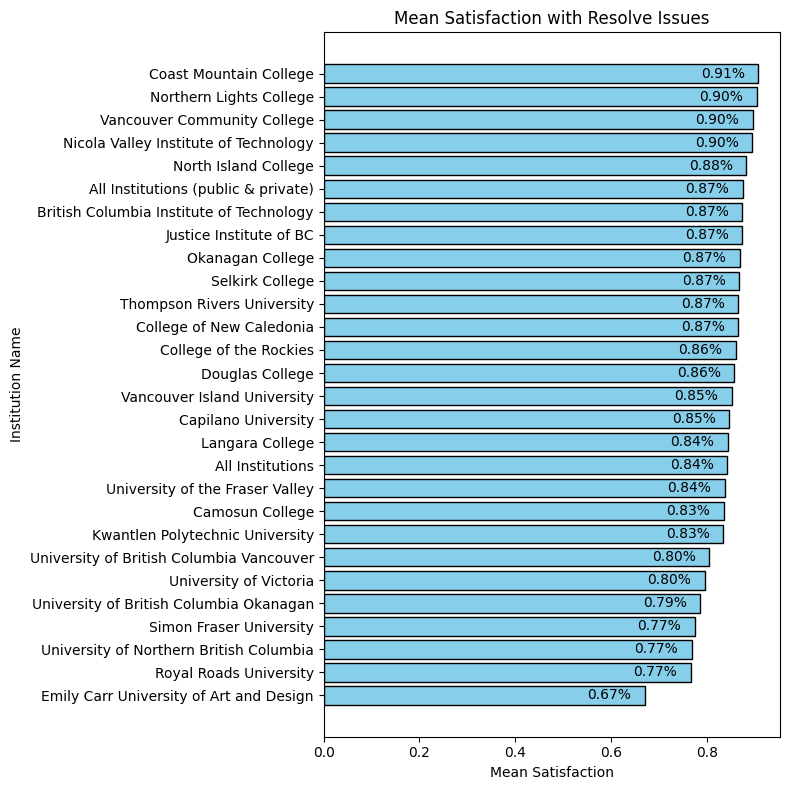

In [105]:
# Calculate the mean for 'Q51NE2' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51NE2"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Resolve Issues')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Learn on your Own

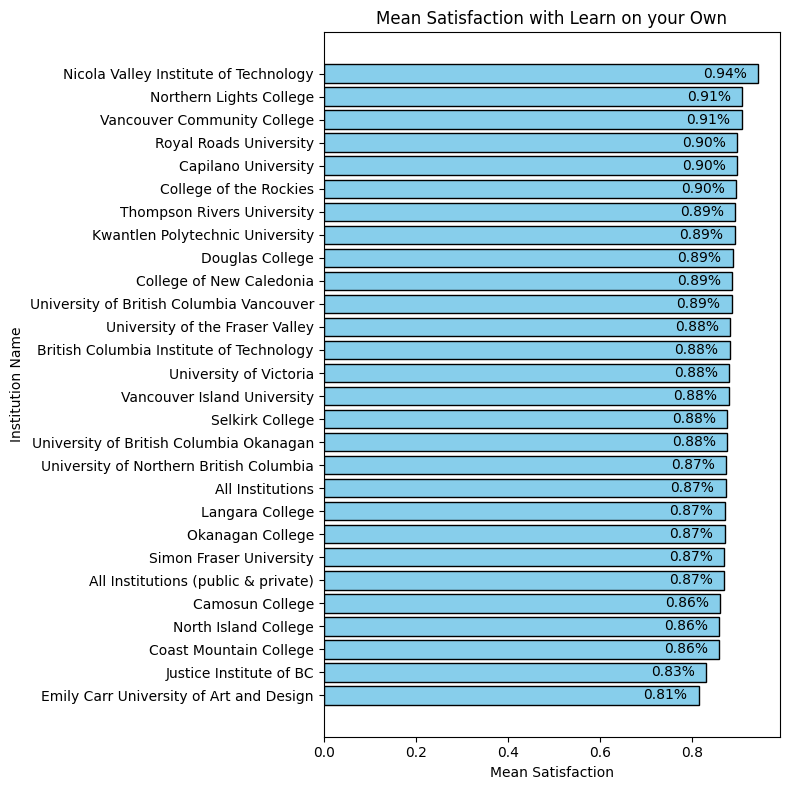

In [106]:
# Calculate the mean for 'Q51NI' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51NI"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Learn on your Own')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Read and comprehend material

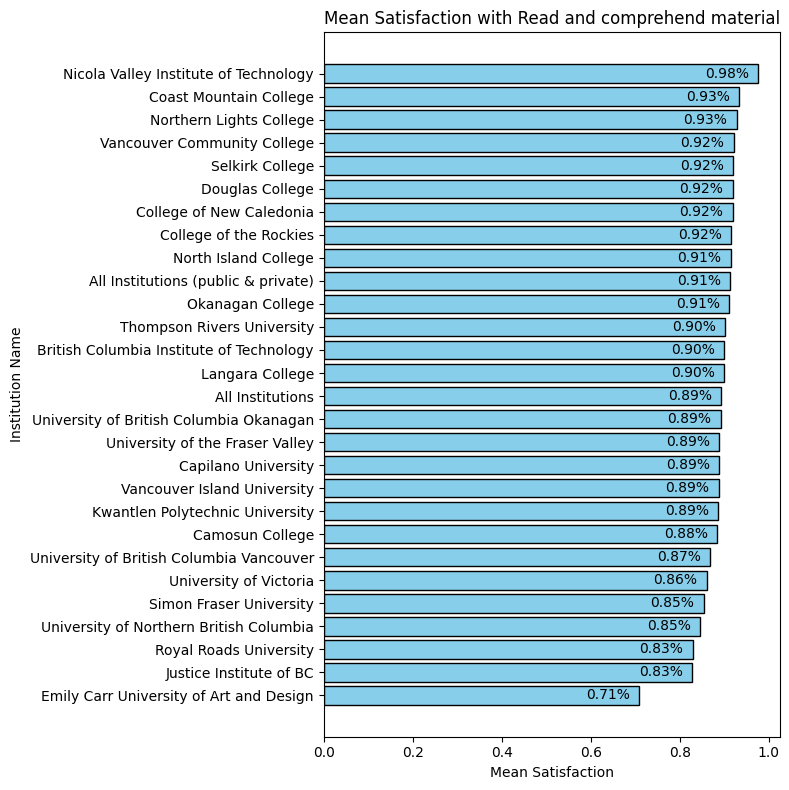

In [107]:
# Calculate the mean for 'Q51NJ' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51NJ"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Read and comprehend material')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Quality for Instruction

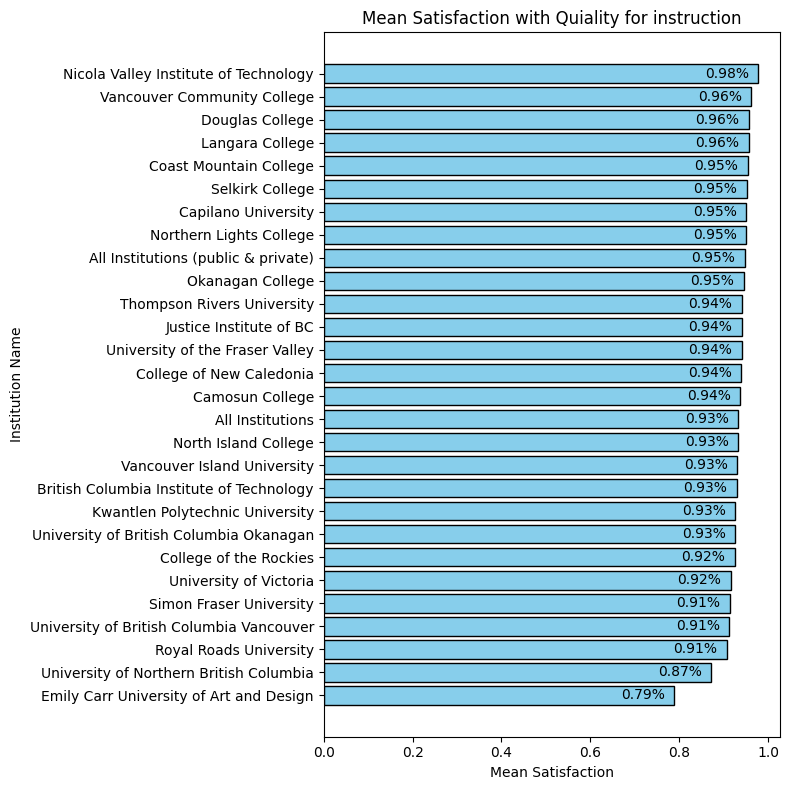

In [108]:
# Calculate the mean for 'Q52A' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q52A"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Quiality for instruction')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

# Satisfaction with education by program area

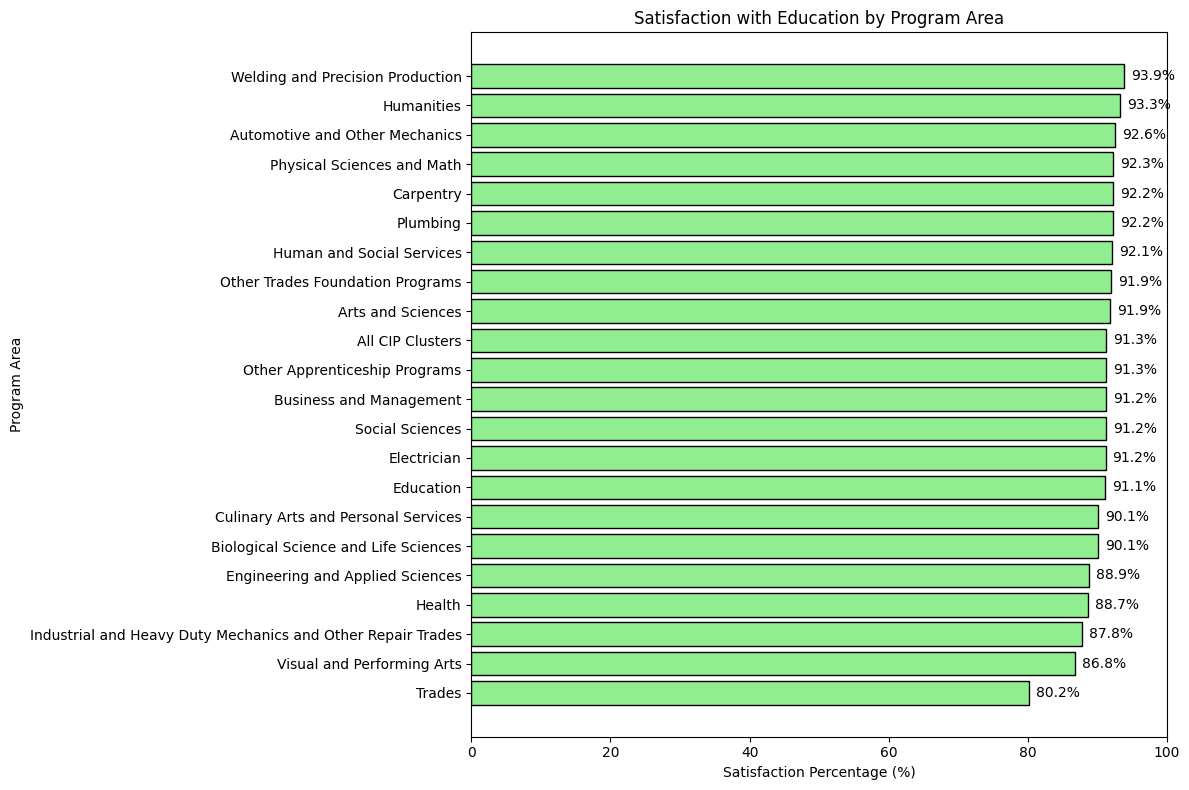

In [109]:
# Group by program area and calculate the mean satisfaction percentage
satisfaction_by_program_area = data.groupby('PROGRAM_AREA_NAME')['Q49A'].mean() * 100

# Sort the values for better visualization
satisfaction_by_program_area = satisfaction_by_program_area.sort_values()

# Plotting the average satisfaction percentages for each program area
plt.figure(figsize=(12, 8))
bars = plt.barh(satisfaction_by_program_area.index, satisfaction_by_program_area.values, color='lightgreen', edgecolor='black')
plt.title('Satisfaction with Education by Program Area')
plt.xlabel('Satisfaction Percentage (%)')
plt.ylabel('Program Area')
plt.xlim(0, 100)  # Set limits for x-axis

# Add percentage labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()

# Helpfulness in Skill Development :
Former students were asked how helpful their program was in their development of a number of skills.Percentages are based on respondents who said their program was very helpful or helpful in developing the skill.

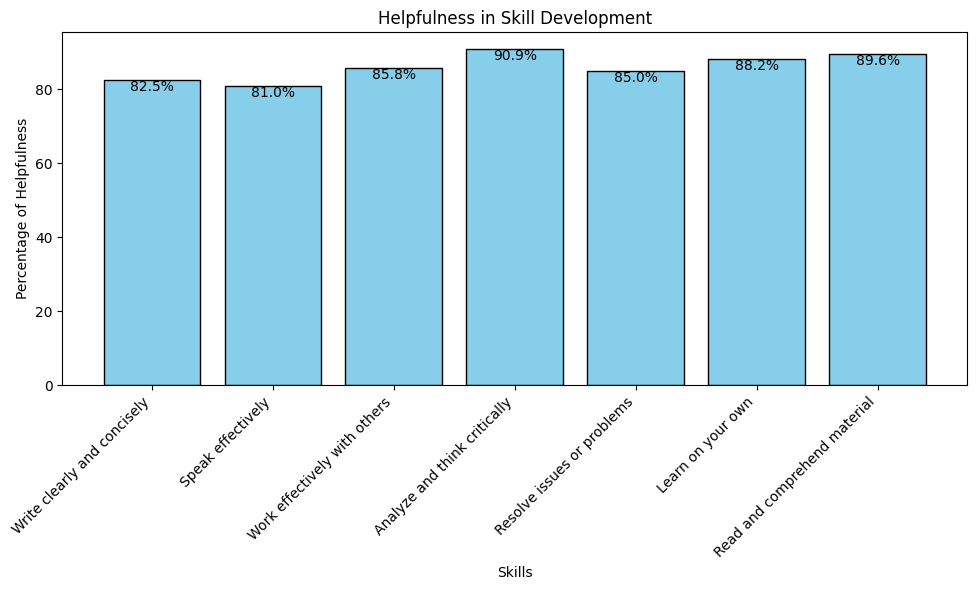

In [111]:
# Define skill columns and their labels
skill_columns = ["Q51NA", "Q51NB", "Q51ND", "Q51NE1", "Q51NE2", "Q51NI", "Q51NJ"]
skill_labels = [
    "Write clearly and concisely",
    "Speak effectively",
    "Work effectively with others",
    "Analyze and think critically",
    "Resolve issues or problems",
    "Learn on your own",
    "Read and comprehend material"
]

# Calculate the helpfulness percentages for each skill
skill_helpfulness = data[skill_columns].mean() * 100

# Plot with custom labels
plt.figure(figsize=(10, 6))
bars = plt.bar(skill_labels, skill_helpfulness, color='skyblue', edgecolor='black')
plt.title('Helpfulness in Skill Development')
plt.xlabel('Skills')
plt.ylabel('Percentage of Helpfulness')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for bar, percent in zip(bars, skill_helpfulness):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3, f'{percent:.1f}%',
             ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

# Working in a program-related job by program area

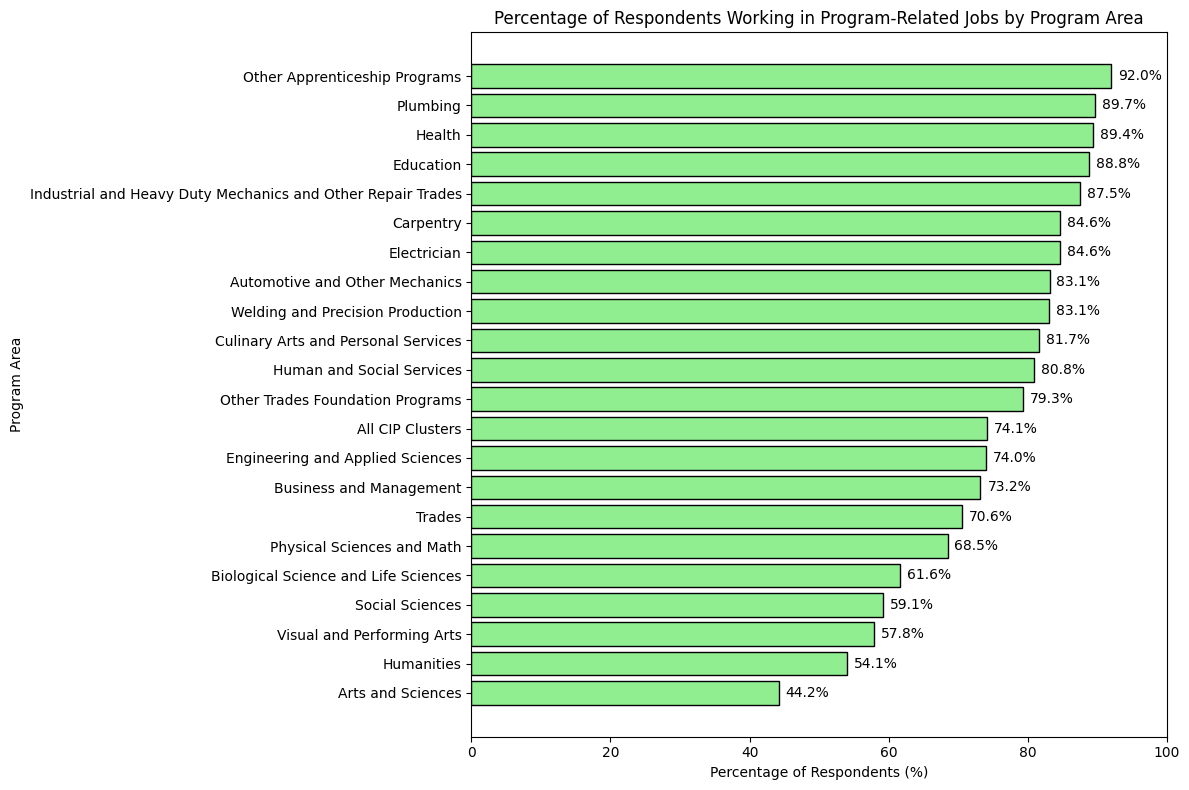

In [112]:
#Group by program area and calculate the mean percentage of respondents working in a program-related job
job_related_by_program_area = data.groupby('PROGRAM_AREA_NAME')['JOB_PROGRAM_RELATED'].mean() * 100

# Sort the values for better visualization
job_related_by_program_area = job_related_by_program_area.sort_values()

# Plotting the average percentages for each program area
plt.figure(figsize=(12, 8))
bars = plt.barh(job_related_by_program_area.index, job_related_by_program_area.values, color='lightgreen', edgecolor='black')
plt.title('Percentage of Respondents Working in Program-Related Jobs by Program Area')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Program Area')
plt.xlim(0, 100)  # Set limits for x-axis

# Add percentage labels on top of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()

# Knowledge and skills gained useful in performing job by program area

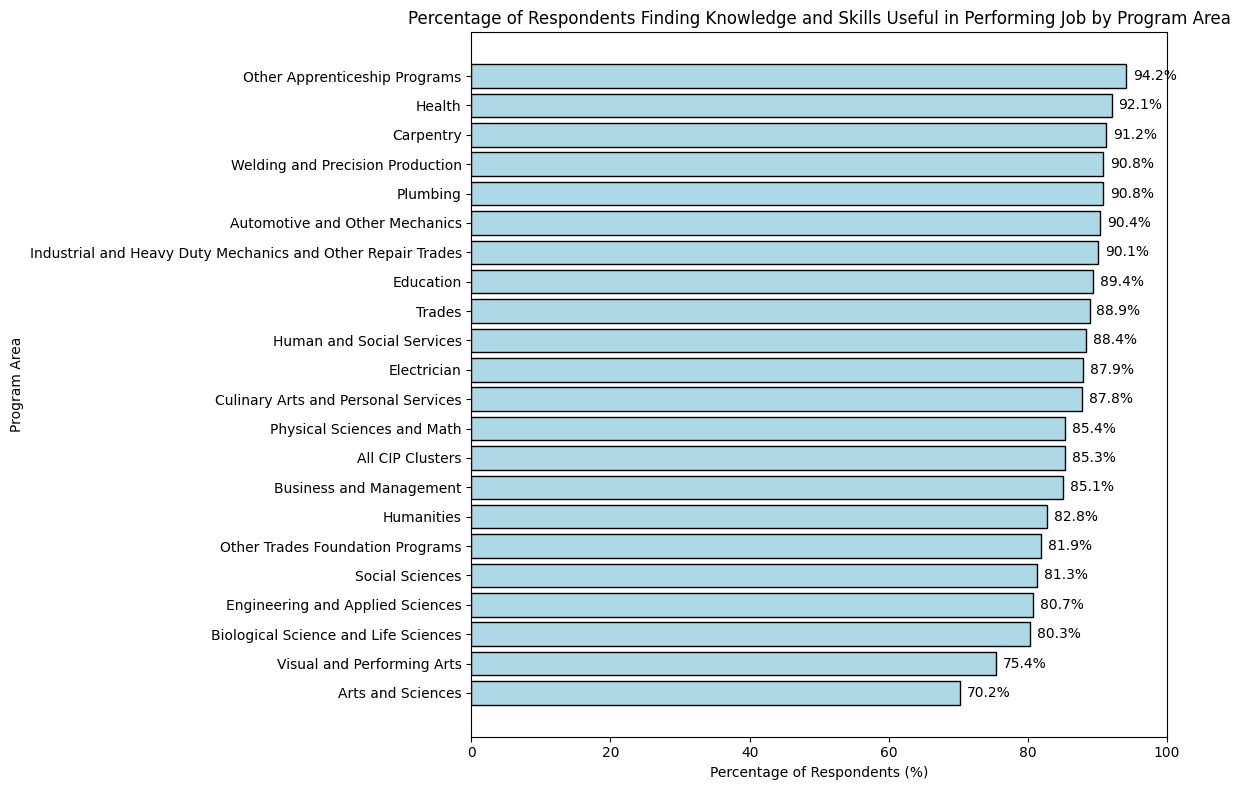

In [114]:
# Group by program area and calculate the mean percentage of respondents who found their education useful for their job
usefulness_by_program_area = data.groupby('PROGRAM_AREA_NAME')['USEFUL_PERFORM_JOB'].mean() * 100

# Sort the values for better visualization
usefulness_by_program_area = usefulness_by_program_area.sort_values()

# Plotting the average percentages for each program area
plt.figure(figsize=(12, 8))
bars = plt.barh(usefulness_by_program_area.index, usefulness_by_program_area.values, color='lightblue', edgecolor='black')
plt.title('Percentage of Respondents Finding Knowledge and Skills Useful in Performing Job by Program Area')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Program Area')
plt.xlim(0, 100)  # Set limits for x-axis

# Add percentage labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()

#  Outlier Detection

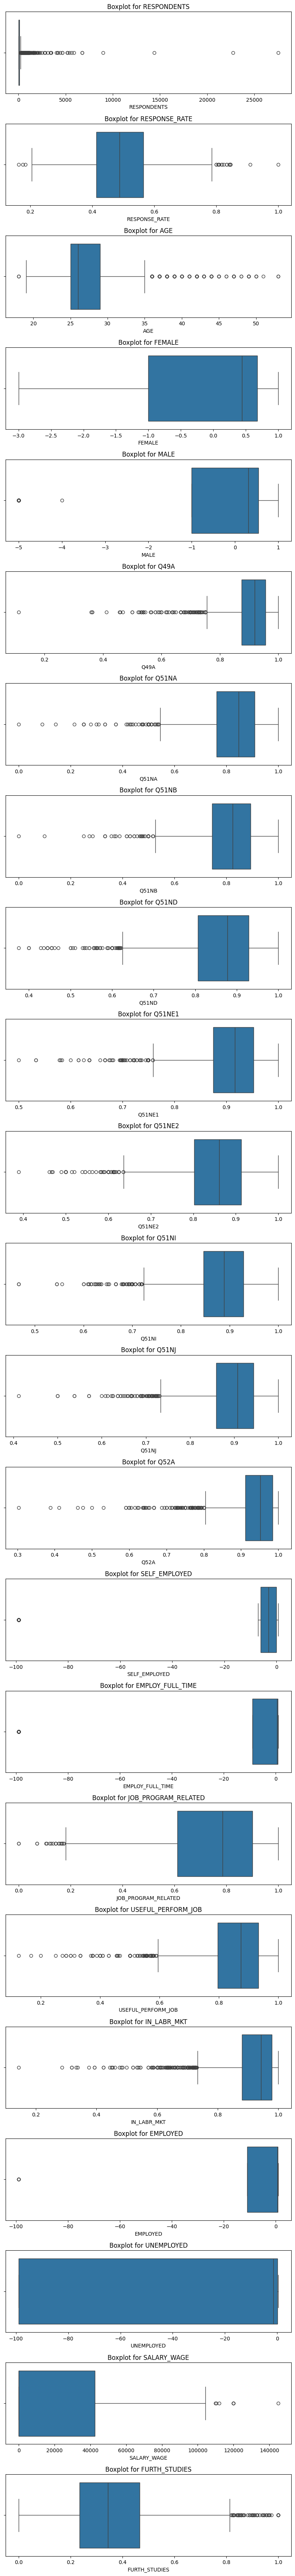

In [115]:
numerical_columns = data.select_dtypes(include=['number'])
fig, axes = plt.subplots(nrows=len(numerical_columns.columns), ncols=1, figsize=(8, len(numerical_columns.columns) * 3))

for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")

# Adjust layout
plt.tight_layout()
plt.show()

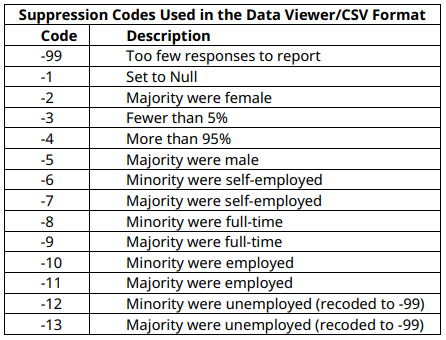

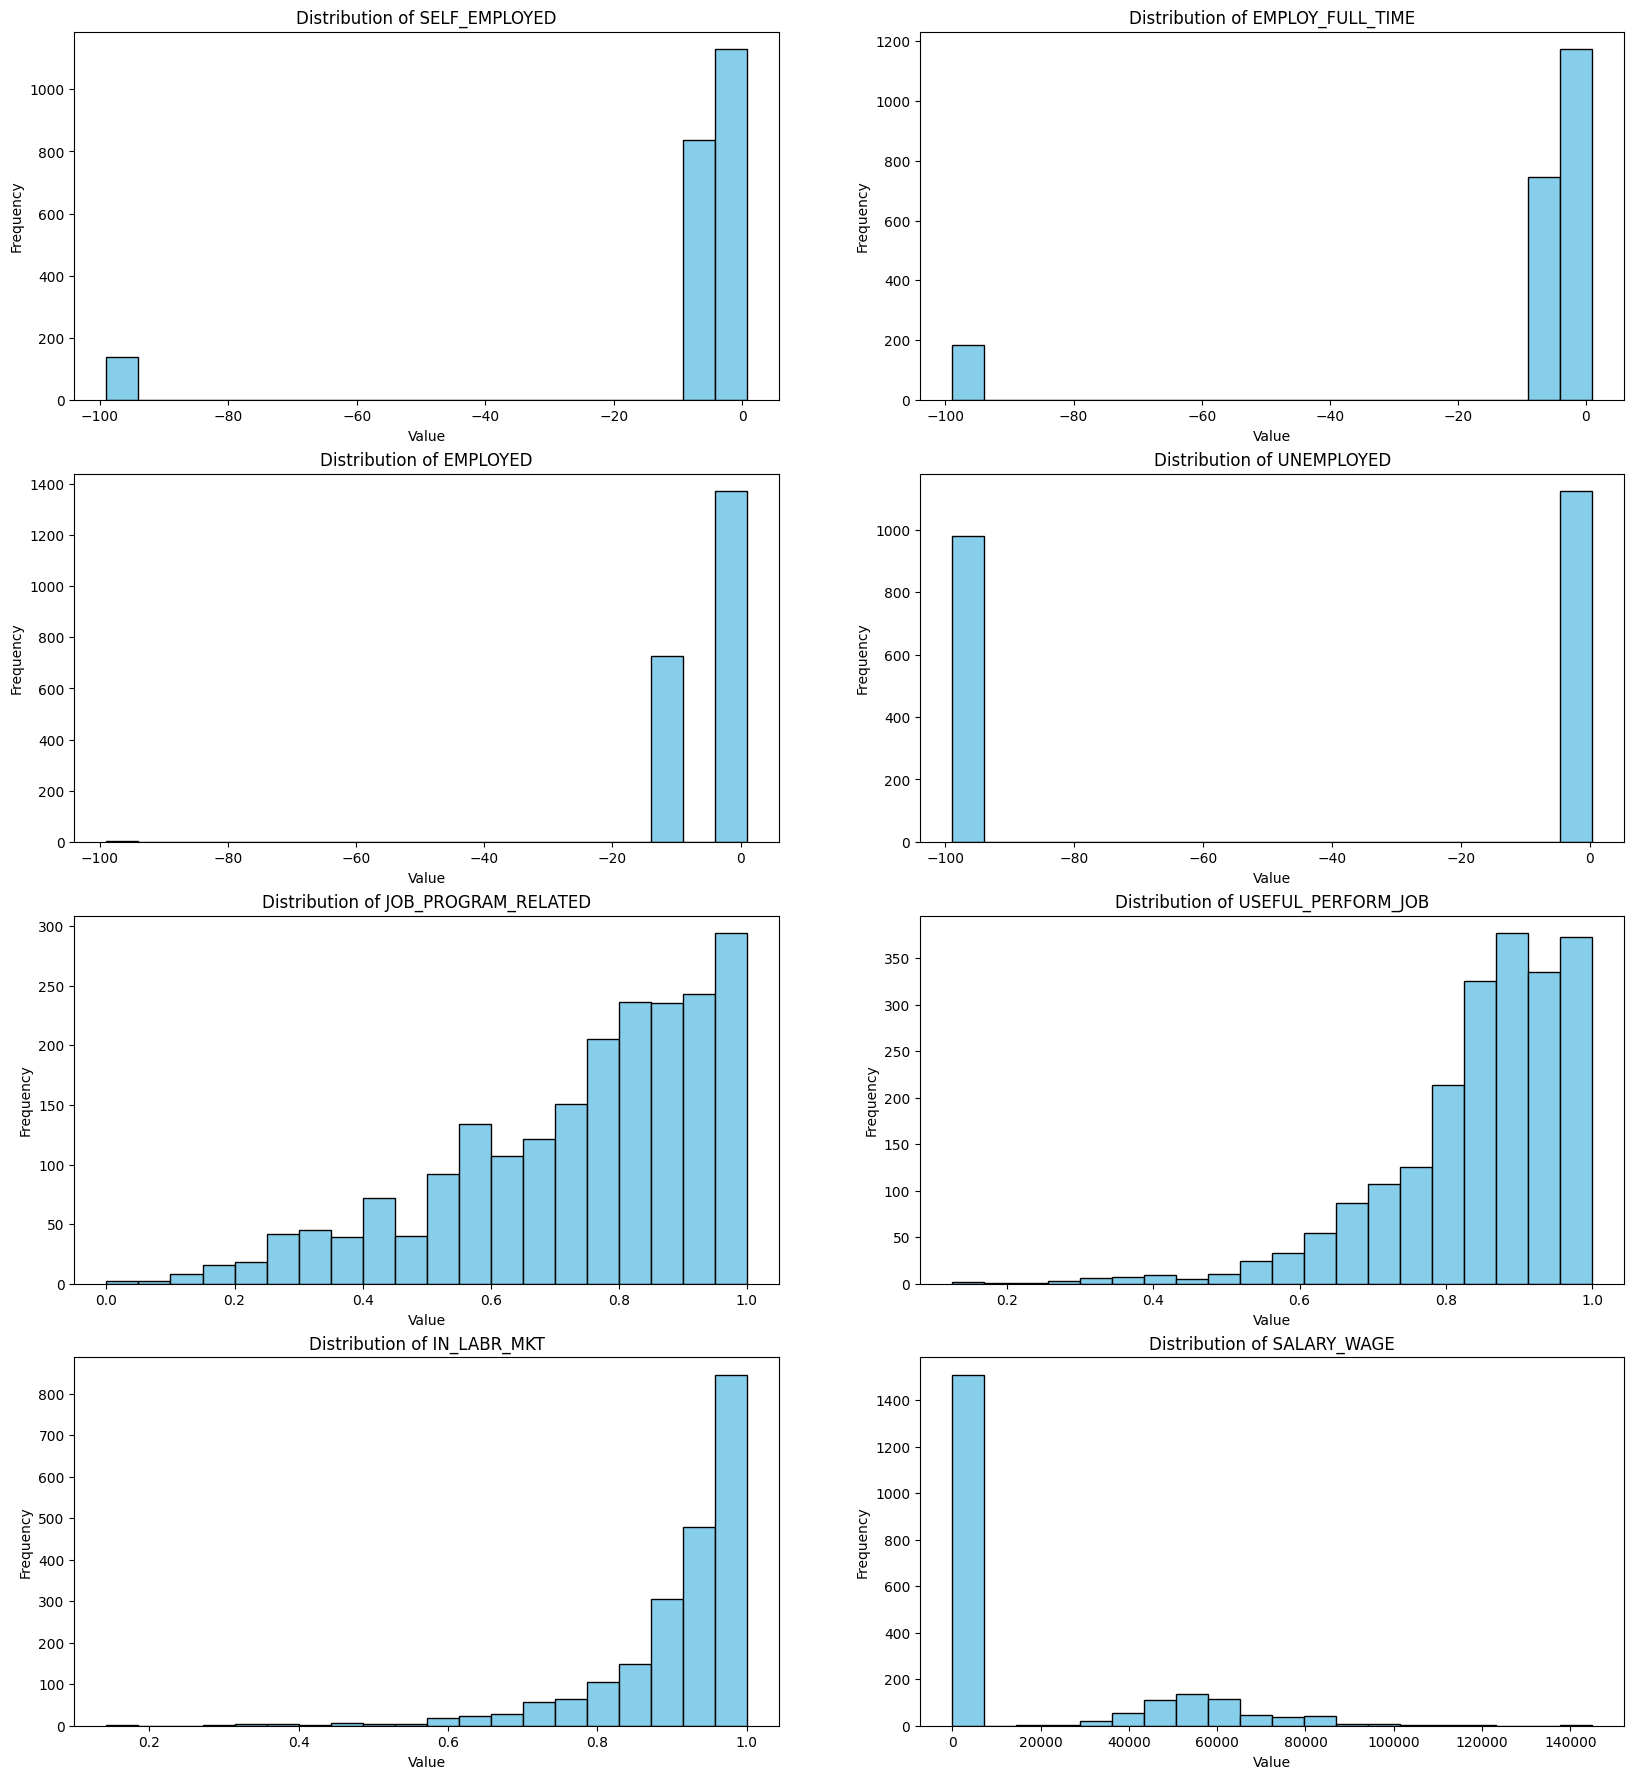

In [ ]:
# Define the columns of interest
categorical_columns = [
    "SELF_EMPLOYED",
    "EMPLOY_FULL_TIME",
    "EMPLOYED",
    "UNEMPLOYED",
    "JOB_PROGRAM_RELATED",
    "USEFUL_PERFORM_JOB",
    "IN_LABR_MKT",
    "SALARY_WAGE",
]

# Create a 2x2 subplot layout
fig, axes = plt.subplots(4, 2, figsize=(20, 22))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate a histogram for each column
for i, column in enumerate(categorical_columns):
    # Create the histogram on the corresponding subplot
    axes[i].hist(data[column], bins=20, edgecolor='black', color='skyblue')

    # Add title and labels
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Data Cleaning

Proposal for Data Cleaning:

-Column Removal:

Columns FURTH_STUDIES, Q11_7, and Q52_6 should be eliminated due to the high
number of null values.

-Filter Sections:

The "All Institutions" filter shows repeated values. Clarification is needed on how to eliminate these duplicates.

-Institution Code:

The Institution Code and Institution Name columns contain the same information. It is recommended to remove the Institution Code column.

-Gender Distribution:

The gender distribution data contains disproportionately large negative percentages, which are not meaningful. These values should be removed.

-Employment Data:

In the "Self Employed" and "Employed Full Time" categories, there are numerous instances of "too few responses to report." It is suggested to eliminate these values and adjust the coding accordingly.

-Employment Status:

Negative percentages appear in both the "Employed" and "Unemployed" categories. The percentages for "All Institutions" seem the most reasonable. It is proposed to create a separate DataFrame that includes only the information for "All Institutions."

-Salary Wage Data:

The Salary Wage data currently mixes annual salaries with hourly wages. It is suggested to convert all entries to hourly wage for consistency.

In [ ]:
#Renaming Columns
# Dictionary for renaming columns
column_rename_mapping = {
    "Q49A": "Education_Satisfaction",
    "Q51NA": "Write_Clearly",
    "Q51NB": "Speak_Effectively",
    "Q51ND": "Work_Effectively",
    "Q51NE1": "Critical_Thinking",
    "Q51NE2": "Resolve_Issues",
    "Q51NI": "Self_Learning",
    "Q51NJ": "Comprehension",
    "Q52A": "Quality_Instruction"
}

# Rename the columns in the DataFrame
data.rename(columns=column_rename_mapping, inplace=True)

In [ ]:
# Drop the specified columns from the DataFrame
data.drop(columns=['FURTH_STUDIES', 'Q11_7', 'Q52_6','INSTITUTION'], inplace=True)

In [ ]:
#Removing Negative percentages in Gender Distribution
data['FEMALE'] = data['FEMALE'].where(data['FEMALE'] >= 0, np.nan)
data['MALE'] = data['MALE'].where(data['MALE'] >= 0, np.nan)

In [ ]:
#Removing -99 Values
# Replace all -99 values with NaN
data.replace(-99, np.nan, inplace=True)


<Axes: >

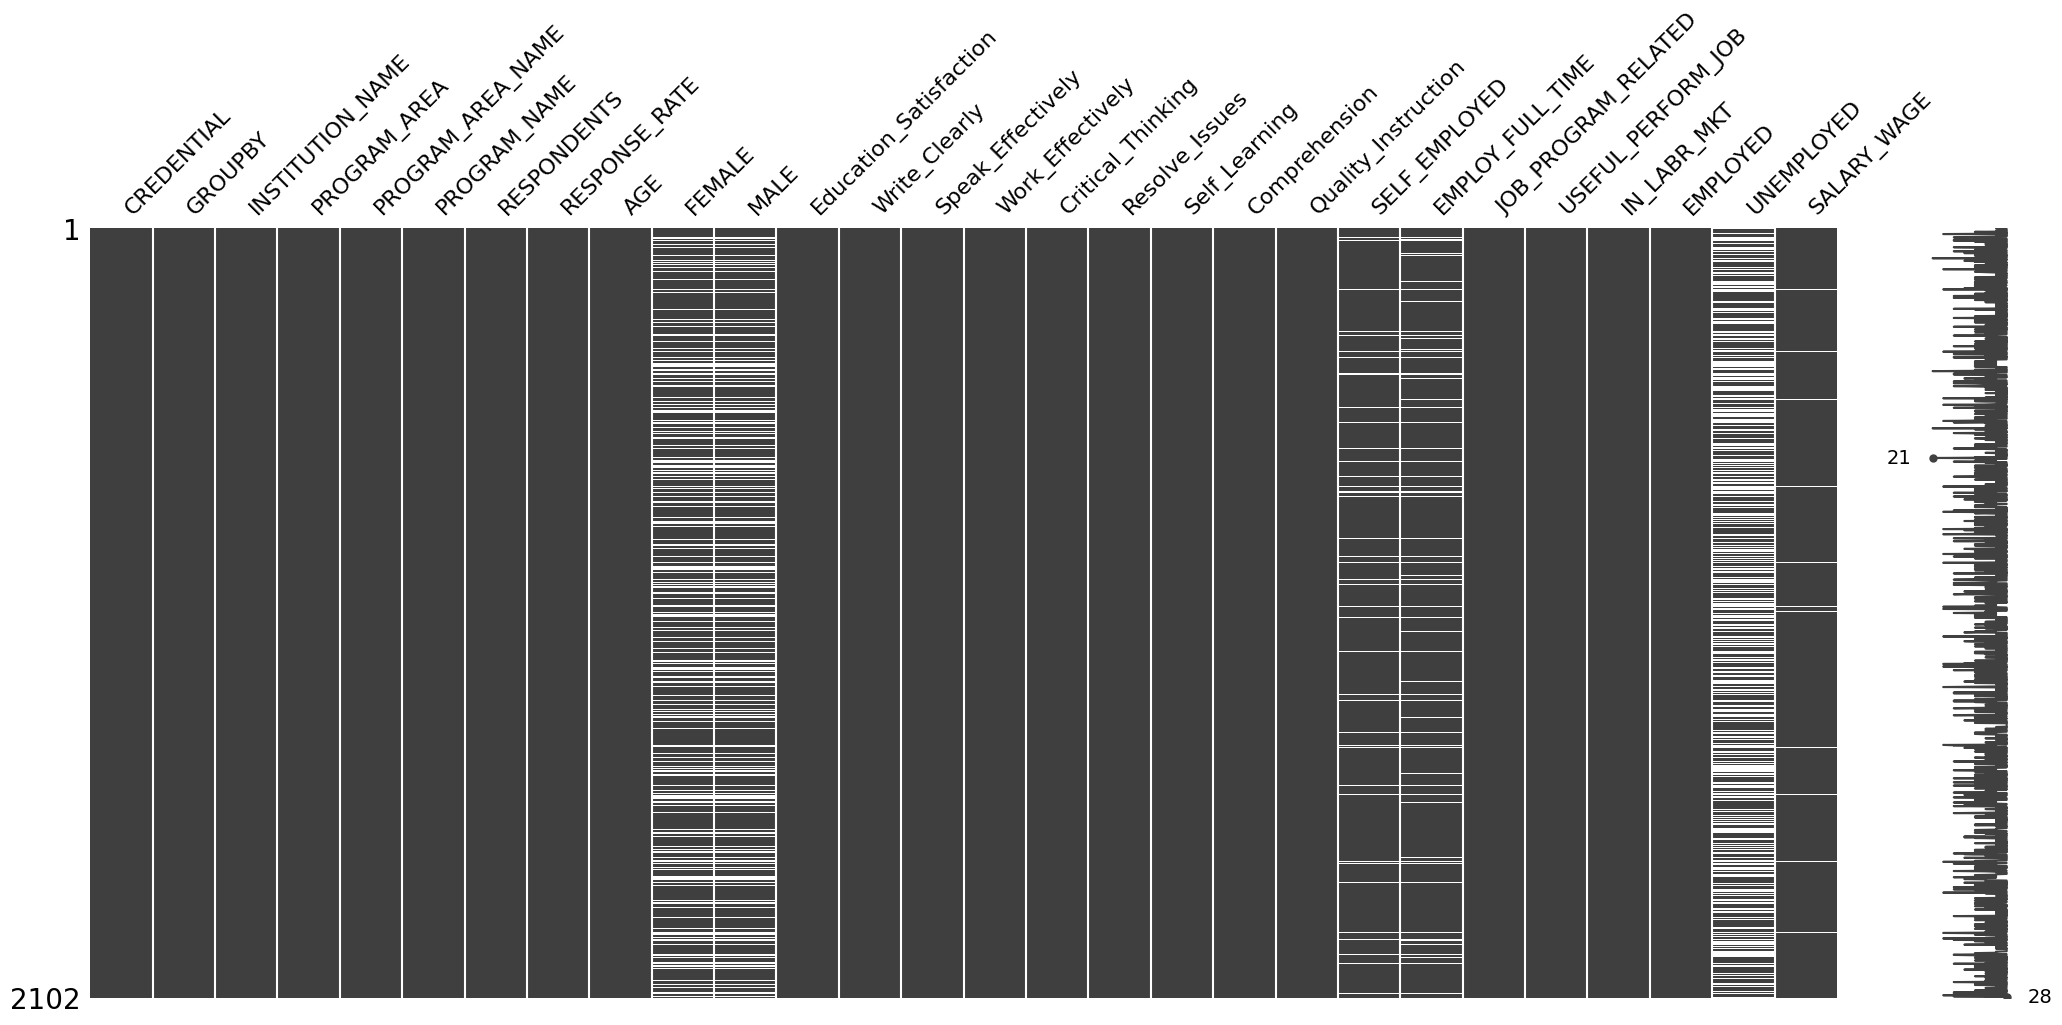

In [ ]:
# Visualising Missing Values
import missingno as msno
msno.matrix(data.sample(2102))

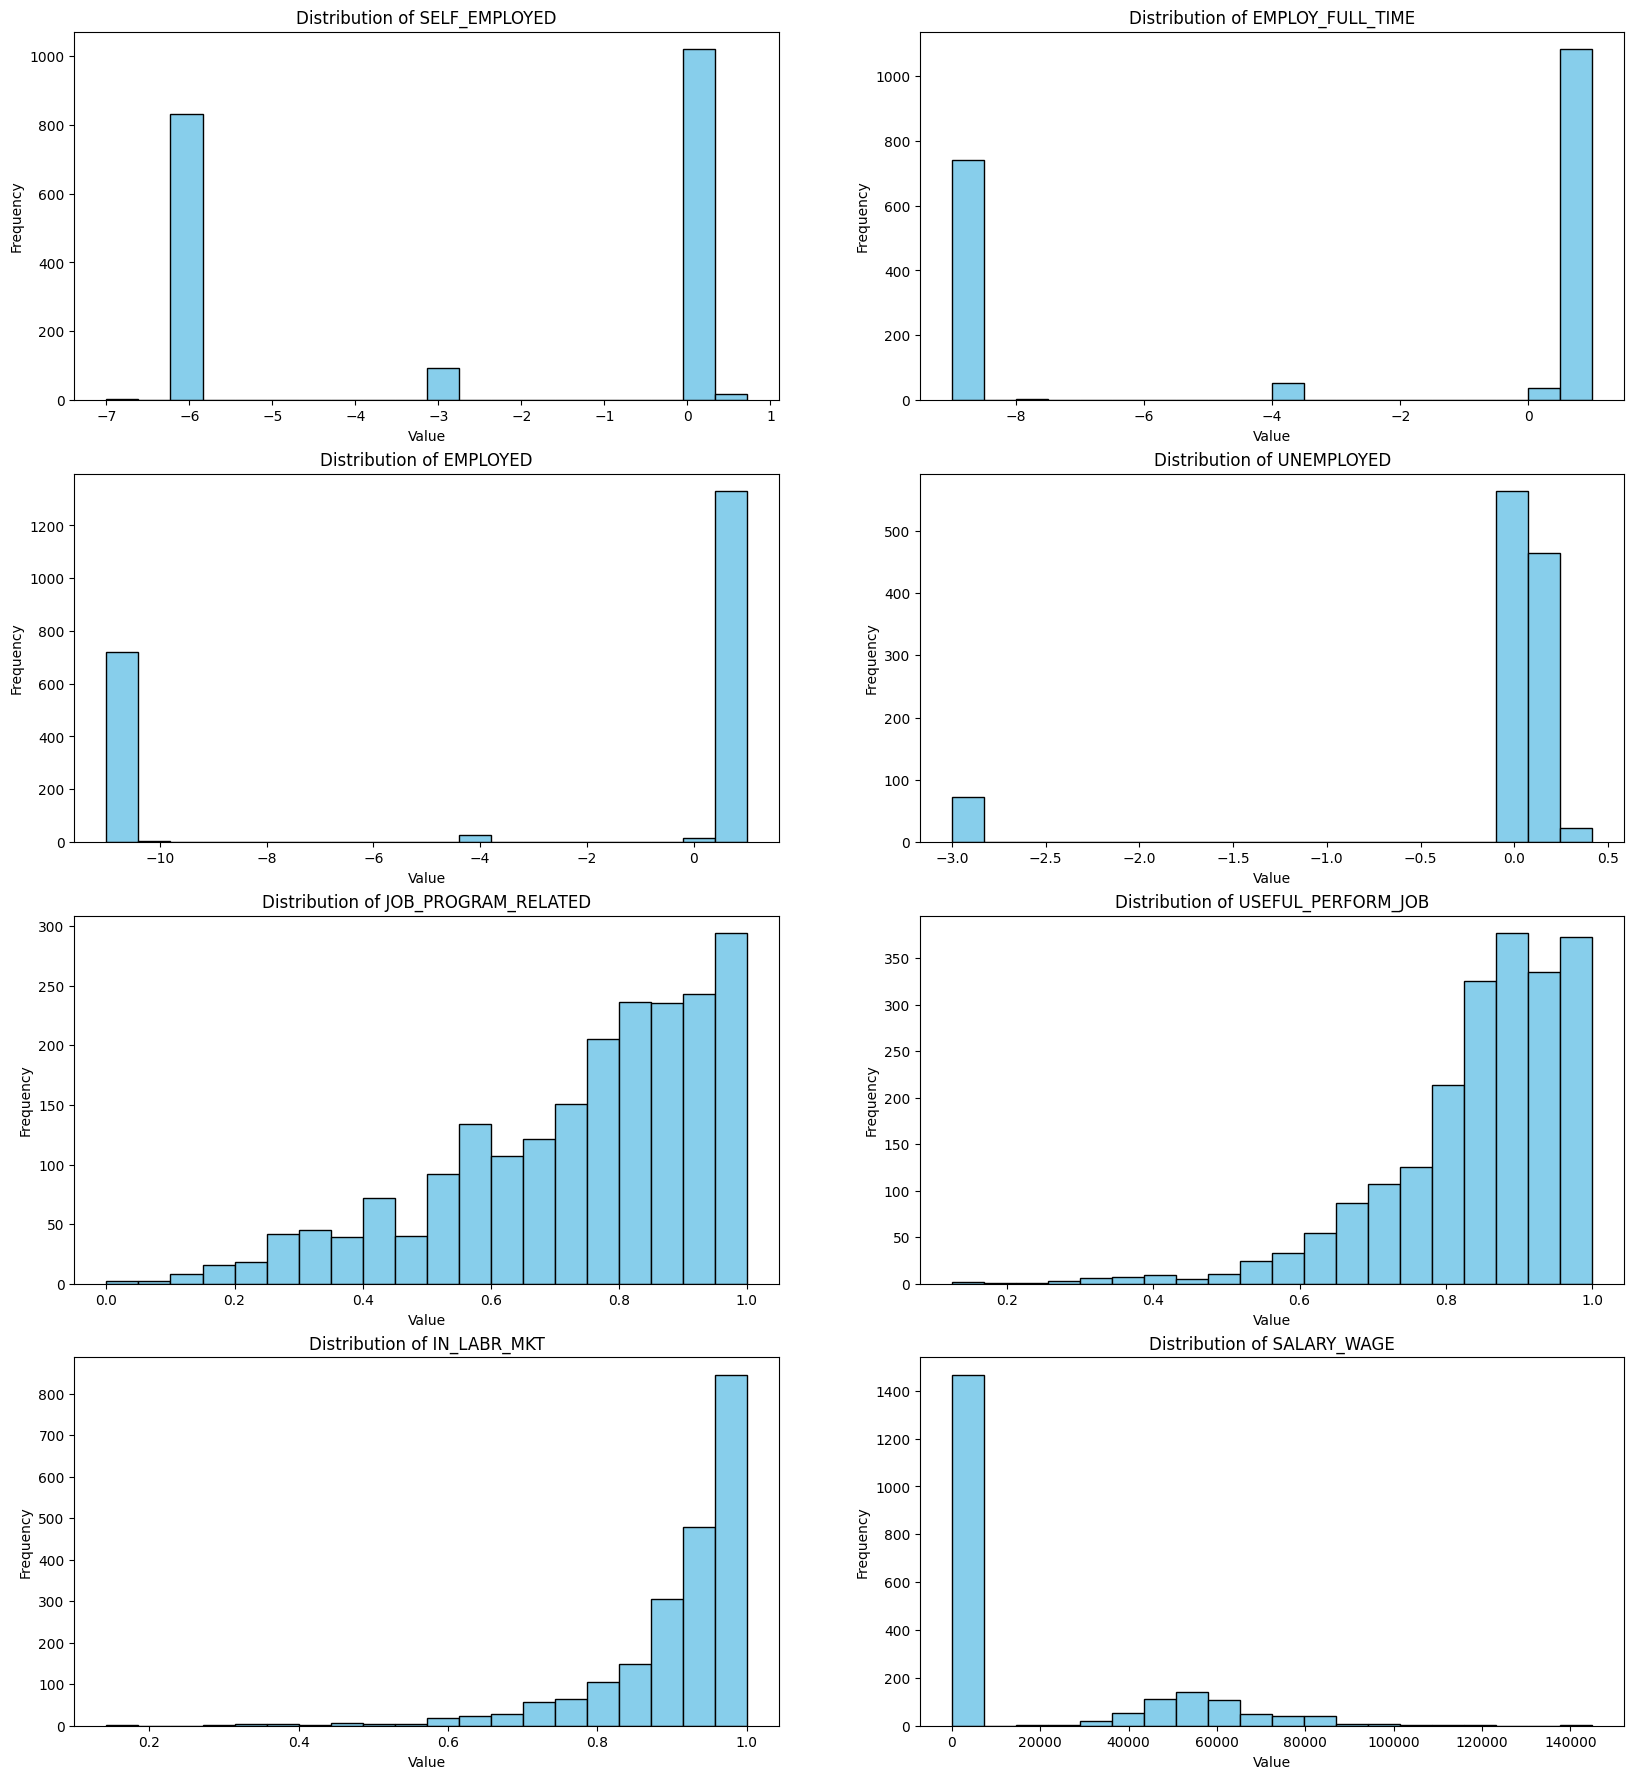

In [ ]:
# Define the columns of interest
categorical_columns = [
    "SELF_EMPLOYED",
    "EMPLOY_FULL_TIME",
    "EMPLOYED",
    "UNEMPLOYED",
    "JOB_PROGRAM_RELATED",
    "USEFUL_PERFORM_JOB",
    "IN_LABR_MKT",
    "SALARY_WAGE",
]

# Create a 2x2 subplot layout
fig, axes = plt.subplots(4, 2, figsize=(20, 22))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate a histogram for each column
for i, column in enumerate(categorical_columns):
    # Create the histogram on the corresponding subplot
    axes[i].hist(data[column], bins=20, edgecolor='black', color='skyblue')

    # Add title and labels
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')